<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
## <font size="5">*Alexander A. Nazarov, 2022*
# <center> <font size="6"> ***Регрессионный анализ в DataScience. Простая линейная регрессия. Библиотека statsmodels</p>***
# <center> <font size="6"> ***Regression analysis in DataScience. Simple linear regression. Module statsmodels</p>***
***

In [158]:
import time
start_time = time.time()

Подключение модулей и библиотек:

In [159]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Настройки numpy
np.set_printoptions(precision = 4, floatmode='fixed')

# Настройки Pandas
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.22.2
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.2
Текущая версия модуля sympy:       1.9


In [160]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\SKILL FACTORY\REPOSITORY\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [161]:
# Константы
INCH = 25.4    # мм/дюйм
DecPlace = 5    # number of decimal places - число знаков после запятой

Доверительная вероятность и уровень значимости:

In [162]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <u> <font size="5"> ***АКТУАЛЬНОСТЬ ТЕМЫ***

<font size="4"> <u>**Общие положения**</u>

Про регрессионный анализ вообще, и его применение в DataScience написано очень много. Есть множество учебников, монографий, справочников и статей по прикладной статистике, огромное количество информации в интернете, примеров расчетов. Можно найти множество кейсов, реализованных с использованием средств Python. Казалось бы - что тут еще можно добавить?

Однако, как всегда, есть нюансы:
1. Регрессионный анализ - это прежде всего процесс, набор действий исследователя по определенному алгоритму: **"подготовка исходных данных - построение модели - анализ модели - прогнозирование с помощью модели"**. Это ключевая особенность. Не представляет особой сложности сформировать DataFrame исходных данных и построить модель, запустить процедуру из библиотеки **statsmodels**. Однако подготовка исходных данных и последующий анализ модели требуют гораздо больших затрат человеко-часов специалиста и строк программного кода, чем, собственно, построение модели. На этих этапах часто приходится возвращаться назад, корректировать модель или исходные данные. Этому, к сожалению, во многих источниках, не удаляется достойного внимания, а иногда - и совсем не уделяется внимания, что приводит к превратному представлению о регрессионном анализе.
2. Далеко не во всех источниках уделяется должное внимание интерпретации промежуточных и финальных результатов. Специалист должен уметь интерпретировать каждую цифру, полученную в ходе работы над моделью.
3. Далеко не все процедуры на этапах подготовки исходных данных или анализа модели в источниках разобраны подробно. Например, про проверку значимости коэффициента детерминации найти информацию не представляет труда, а вот про проверку адекватности модели, построение доверительных интервалов регрессии или про специфические процедуры (например, тест Уайта на гетероскедастичность) информации гораздо меньше.
4. Своеобразная сложность может возникнуть с проверкой статистических гипотез: для отечественной литературы по прикладной статистике больше характерно проверять гипотезы путем сравнения расчетного значения критерия с табличным, а в иностранных источниках чаще определяется расчетный уровень значимости и сравнивается с заданным (чаще всего 0.05 = 1-0.95). В разных источниках информации реализованы разные подходы. Инструменты **python** (прежде всего библиотеки **scipy** и **statsmodels**) также в основном оперируют с расчетным уровнем значимости.
5. Ну и, наконец, нельзя не отметить, что техническая документация библиотеки **statsmodels** составлена, на мой взгляд, далеко не идеально: информация излагается путано, изобилует повторами и пропусками, описание классов, функций и свойств выполнено фрагментарно и количество примеров расчетов - явно недостаточно.

Поэтому я решил написать ряд обзоров по регрессионному анализу средствами **Python**, в которых акцент будет сделан на практических примерах, алгоритме действий исследователя, интерпретации всех полученных результатов, конкретных методических рекомендациях. Буду стараться по возможности избегать теории (хотя совсем без нее получится) - все-таки предполагается, что специалист DataScience должен знать теорию вероятностей и математическую статистику, хотя бы в рамках курса высшей математики для технического или экономического вуза.

В данном статье остановимся на самои простом, классическом, стереотипном случае - **простой линейной регрессии (simple linear regression)**, или как ее еще принято называть - **парной линейной регрессионной модели (ПЛРМ)** - в ситуации, когда исследователя не подстерегают никакие подводные камни и каверзы - исходные данные подчиняются нормальному закону, в выборке отсутствуют аномальные значения, отсутствует ложная корреляция. Более сложные случаи рассмотрим в дальнейшем.

Для построение регрессионной модели будем пользоваться библиотекой **statsmodels**.

В данной статье мы рассмотрим по возможности полный набор статистических процедур. Некоторые из них (например, дескриптивная статистика или дисперсионный анализ регрессионной модели) могут показаться избыточными. Все так, но эти процедуры улучшают наше представление о процессе и об исходных данных, поэтому в разбор я их включил, а каждый исследователь сам вправе для себя определить, потребуются ему эти процедуры или нет.

<font size="4"> <u>**Краткий обзор источников**</u>

Источников информации по корреляционному и регрессионному анализу огромное количество, в них можно просто утонуть. Поэтому позволю себе просто порекомендовать ряд источников, на мой взгляд, наиболее полезных:

1. Кобзарь А.И. Прикладная математическая статистика. Для инженеров и научных работников. - М.: ФИЗМАТЛИТ, 2006. - 816 с.
2. Львовский Е.Н. Статистические методы построения эмпирических формул. - М.: Высшая школа, 1988. - 239 с.
3. Фёрстер Э., Рёнц Б. Методы корреляционного и регрессионного анализа / пер с нем. - М.: Финансы и статистика, 1983. - 302 с.
4. Афифи А., Эйзен С. Статистический анализ. Подход с использованием ЭВМ / пер с англ. - М.: Мир, 1982. - 488 с.
5. Дрейпер Н., Смит Г. Прикладной регрессионный анализ. Книга 1 / пер.с англ. - М.: Финансы и статистика, 1986. - 366 с.
6. Айвазян С.А. и др. Прикладная статистика: Исследование зависимостей. - М.: Финансы и статистика, 1985. - 487 с.
7. Прикладная статистика. Основы эконометрики: В 2 т. 2-е изд., испр. - Т.2: Айвазян С.А. Основы эконометрики. - М.: ЮНИТИ-ДАНА, 2001. - 432 с.
8. Магнус Я.Р. и др. Эконометрика. Начальный курс - М.: Дело, 2004. - 576 с.
9. Носко В.П. Эконометрика. Книга 1. - М.: Издательский дом "Дело" РАНХиГС, 2011. - 672 с.
10. Брюс П. Практическая статистика для специалистов Data Science / пер. с англ. - СПб.: БХВ-Петербург, 2018. - 304 с.
11. Уатт Дж. и др. Машинное обучение: основы, алгоритмы и практика применения / пер. с англ. - СПб.: БХВ-Петербург, 2022. - 640 с.
    

Прежде всего следует упомянуть справочник Кобзаря А.И. [1] - это безусловно выдающийся труд. Ничего подобного даже близко не издавалось. Всем рекомендую иметь под рукой.<br>
Есть очень хорошее практическое пособие [2] - для начинающих и практиков.<br>
Добротная работа немецких авторов [3]. Все разобрано подробно, обстоятельно, с примерами - очень хорошая книга. Примеры приведены из области экономики.<br>
Еще одна добротная работа - [4], с примерами медико-биологического характера.<br>
Работа [5] считается одним из наиболее полных изложений прикладного регрессионного анализа.<br>
Более сложные работы - [6] (классика жанра), [7], [8], [9] - выдержаны на достаточно высоком математическом уровне, примеры из экономической области.<br>
Свежие работы [10] (с примерами на языке **R**) и [11] (с примерами на **python**).

<u>**Cтатьи**</u>

Статей про регрессионный анализ в DataScience очень много, обращаю внимание на некоторые весьма полезные из них.

Серия статей **"Python, корреляция и регрессия"**, охватывающая весь процесс регрессионного анализа:
* первичная обработка данных, визуализация и корреляционный анализ - https://habr.com/ru/post/557998/
* регрессия - https://habr.com/ru/post/558084/
* теория матриц в регрессионном анализе, проверка  адекватности, мультиколлинеарность - https://habr.com/ru/post/558146/
* прогнозирование с помощью регрессионных моделей - https://habr.com/ru/post/558158/

Очень хороший обзор **"Интерпретация summary из statsmodels для линейной регрессии"** (https://habr.com/ru/post/681218/). В этой статье даны очень полезные ссылки http://work.thaslwanter.at/Stats/html/statsModels.html, https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a.

Статья **"Регрессионные модели в Python"** https://nagornyy.me/it/regressionnye-modeli-v-python/

<font size="4"> <u>**Основные предпосылки (гипотезы) регрессионного анализа**</u>

Очень кратко - об этом написано тысячи страниц в учебниках - но все же вспомним некоторые основы теории.

Проверка исходных предпосылок является очень важным моментом при статистическом анализе регрессионной модели. Если мы рассматриваем классическую линейную регрессионную модель вида ![Getting Started](Image/Image_01.png), то основными предпосылками при использовании **обычного метода наименьших квадратов (МНК)** для оценки ее параметров являются:

1. Среднее значение (математическое ожидание) случайной составляющей равно нулю:
   
   ![Getting Started](Image/Image_02.png)

2. Дисперсия случайной составляющей является постоянной:
   
   ![Getting Started](Image/Image_03.png)

В случае нарушения данного условия мы сталкиваемся с явлением **гетероскедастичности**.

3. Значения случайной составляющей статистически независимы (некоррелированы) между собой:
   
   ![Getting Started](Image/Image_04.png)

В случае нарушения данного условия мы сталкиваемся с явлением **автокорреляции**.

4. Условие существования обратной матрицы ![Getting Started](Image/Image_05.png), что эквивалентно одному из двух следующих условий:

   ![Getting Started](Image/Image_06.png)
   
то есть <u>число наблюдений должно превышать число параметров</u>.

5. Значения случайной составляющей некоррелированы со значениями независимых переменных:

    ![Getting Started](Image/Image_07.png)

6. Случайная составляющая имеет нормальный закон распределения (с математическим ожиданием равным нулю - следует из условия 1):

    ![Getting Started](Image/Image_08.png)


Более подробно - см.: [3, с.90], [4, с.147], [5, с.122], [6, с.208], [7, с.49], [8, с.68], [9, с.88].

Кроме гетероскедастичности и автокорреляции возможно возникновение и других статистических аномалий - мультиколлинеарности, ложной корреляции и т.д.

Доказано, что оценки параметров, полученные с помощью МНК, обладают наилучшими свойствами (несмещенность, состоятельность, эффективность) при соблюдении ряда условий:
* выполнение приведенных выше исходных предпосылок регрессионного анализа;
* <u>число наблюдений на одну независимую переменную должно быть не менее 5-6</u>;
* должны отсутствовать аномальные значения (выбросы).

Кроме обычного МНК существуют и другие его разновидности (взвешенный МНК, обобщенный МНК), которые применяются при наличии статистических аномалий. Кроме МНК применяются и другие методы оценки параметров моделей. В этом обзоре мы эти вопросы рассматривать не будем.

<font size="4"> <u>**Алгоритм проведения регрессионного анализа**</u>

Алгоритм действий исследователя при построении регрессионной модели (полевые работы мы, по понятным причинам, не рассматриваем - считаем, что исходные данные уже получены):
1. Подготовительный этап - постановка целей и задач исследования.
2. Первичная обработка исходных данных - об этом много написано в учебниках и пособиях по DataScience, сюда могут относится:
   * выявление нерелевантных признаков (признаков, которые не несут полезной информации), нетипичных данных (выбросов), неинформативных признаков (имеющих большое количество одинаковых значений) и работа с ними (удаление/преобразование);
   * выделение категориальных признаков;
   * работа с пропущенными значениями;
   * преобразование признаков-дат в формат **datetime** и т.д.
3. Визуализация исходных данных - предварительный графический анализ.
4. Дескриптивная (описательная) статистика - расчет выборочных характеристик и предварительные выводы о свойствах исходных данных.
5. Исследование закона распределения исходных данных и, при необходимости, преобразование исходных данных к нормальному закону распределения.
6. Выявление статистически аномальных значений (выбросов), принятие решения об их исключении.<br>
   Этапы 4, 5 и 6 могут быть при необходимости объединены.
7. Корреляционный анализ - исследование корреляционных связей между исходными данными; это разведка перед проведением регрессионного анализа.
8. Построение регрессионной модели:
   * выбор моделей;
   * выбор методов;
   * оценка параметров модели.
9. Статистический анализ регрессионной модели:  
   * оценка ошибок аппроксимации (**error metrics**);
   * анализ остатков (проверка нормальности распределения остатков и гипотезы о равенстве нулю среднего значения остатков);
   * проверка адекватности модели;
   * проверка значимости коэффициента детерминации;
   * проверка значимости коэффициентов регрессии;
   * проверка мультиколлинеарности (для множественных регрессионных моделей; вообще мультиколлинеарные переменные выявляются еще на стадии корреляционного анализа);
   * проверка автокорреляции;
   * проверка гетероскедастичности.<br>
   Этапы 8 и 9 могут быть при необходимости повторяться несколько раз.
10. Сравнительный анализ нескольких регрессионных моделей, выбор наилучшей (при необходимости).
11. Прогнозирование с помощью регрессионной модели и оценка качества прогноза.
12. Выводы и рекомендации.

Само собой, этот алгоритм не есть истина в последней инстанции - в зависимости от особенностей исходных данных и вида модели могут возникать дополнительные задачи.

<font size="4"> <u>**Применение пользовательских функций**</u>

Далее в обзоре мной будут использованы несколько пользовательских функций для решения разнообразных задач. Все эти функции созданы для облегчения работы и уменьшения размера программного кода. Данные функции загружается из пользовательского модуля **my_module__stat.py**, который доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython). Лично мне так удобнее работать, хотя каждый исследователь сам формирует себе инструменты по душе - особенно в части визуализации. Желающие могут пользоваться этими функциями, либо создать свои.

Итак, вот перечень данных функций:
* **graph_scatterplot_sns** - функция позволяет построить точечную диаграмму средствами **seaborn** и сохранить график в виде png-файла;
* **graph_hist_boxplot_probplot_XY_sns**  - функция позволяет визуализировать исходные данные для простой линейной регрессии путем одновременного построения гистограммы, коробчатой диаграммы и вероятностного графика (для переменных X и Y) средствами **seaborn** и сохранить график в виде png-файла; имеется возможность выбирать, какие графики строить (h - hist, b - boxplot, p - probplot);
* **descriptive_characteristics** - функция возвращает в виде **DataFrame** набор статистических характеристики выборки, их ошибок и доверительных интервалов;
* **detecting_outliers_mad_test** - функция выполняет проверку наличия аномальных значений (выбросов) по **критерию наибольшего абсолютного отклонения** (более подробно - см.[1, с.547]).
* **norm_distr_check** - проверка нормальности распределения исходных данных с использованием набора из нескольких статистических тестов.
* **corr_coef_check** - функция выполняет расчет коэффициента линейной корреляции Пирсона, проверку его значимости и расчет доверительных интервалов; об этой функции я писал в своей статье https://habr.com/ru/post/683442/.
* **graph_regression_plot_sns** - функция позволяет построить график регрессионной модели.

Ряд пользовательских функций мы создаем в процессе данного обзора (они тоже включены в пользовательский модуль **my_module__stat.py**):
* **regression_error_metrics** - расчет ошибок аппроксимации регрессионной модели;
* **ANOVA_table_regression_model** - вывод таблицы дисперсионного анализа регрессионной модели;
* **regression_model_adequacy_check** - проверка адекватности регрессионной модели по критерию Фишера;
* **determination_coef_check** - проверка значимости коэффициента детерминации по критерию Фишера;
* **regression_coef_check** - проверка значимости коэффициентов регрессии по критеирю Стьюдента;
* **Goldfeld_Quandt_test**, **Breush_Pagan_test**, **White_test** - проверка гетероскедастичности с использование тестов Голдфелда-Квандта, Бриша-Пэгана и Уайта соответственно;
* **regression_pair_predict** - функция для прогнозирования с помощью парной регрессионной модели: рассчитывает прогнозируемое значение переменной **Y** по заданной модели, а также доверительные интервалы среднего и индивидуального значения для полученного прогнозируемого значения **Y**;
* **graph_regression_pair_predict_plot_sns** - прогнозирование: построение графика регрессионной модели (с доверительными интервалами) и вывод расчетной таблицы с данными для заданной области значений **X**.
  

### <center> <u> <font size="5"> ***ПОСТАНОВКА ЗАДАЧИ***

В качестве примера рассмотрим практическую задачу из области экспертизы промышленной безопасности - калибровку ультразвукового прибора для определения прочности бетона.

Итак, суть задачи: при обследовании несущих конструкций зданий и сооружений эксперт определяет прочность бетона с использованием ультразвукового прибора "ПУЛЬСАР-2.1", для которого необходимо предварительно построить градуировочную зависимость. Заключается это в следующем - производятся замеры с фиксацией следующих показателей:
* **X** - показания ультразвукового прибора "ПУЛЬСАР-2.1" (м/с)
* **Y** - результаты замера прочности бетона (методом отрыва со скалыванием) склерометром ИПС-МГ4.03.
 
Предполагается, что между показателями **X** и **Y** имеется линейная регрессионная зависимость, которая позволит прогнозировать прочность бетона на основании измерений, проведенных прибором "ПУЛЬСАР-2.1".

Были выполнены замеры фактической прочности бетона конструкций для бетонов одного вида с одним типом крупного заполнителя, с единой технологией производства. Для построения были выбраны 14 участков (не менее 12), включая участки, в которых значение косвенного показателя максимальное, минимальное и имеет промежуточные значения.

Настройка заголовков отчета:

In [163]:
# Общий заголовок проекта
Task_Project = 'Калибровка ультразвукового прибора "ПУЛЬСАР-2.1" \nдля определения прочности бетона'

# Заголовок, фиксирующий момент времени
AsOfTheDate = ""

# Заголовок раздела проекта
Task_Theme = ""

# Общий заголовок проекта для графиков
Title_String = f"{Task_Project}\n{AsOfTheDate}"

# Наименования переменных
Variable_Name_X = "Скорость УЗК (м/с)"
Variable_Name_Y = "Прочность бетона (МПа)"

### <center> <u> <font size="5"> ***ФОРМИРОВАНИЕ ИСХОДНЫХ ДАННЫХ***

Показания ультразвукового прибора "ПУЛЬСАР-2.1" (м/с):

In [164]:
X = np.array([
    4416, 4211, 4113, 4110, 4122,
    4427, 4535, 4311, 4511, 4475,
    3980, 4490, 4007, 4426
    ])

Результаты замера прочности бетона (методом отрыва со скалыванием) прибором ИПС-МГ4.03:

In [165]:
Y = np.array([
    34.2, 35.1, 31.5, 30.8, 30.0,
    34.0, 35.4, 35.8, 38.0, 37.7,
    30.0, 37.8, 31.0, 35.2
    ])

Запишем данные в **DataFrame**:

In [166]:
calibrarion_df = pd.DataFrame({
    'X': X,
    'Y': Y})
display(calibrarion_df)
calibrarion_df.info()

,X,Y
0,4416,34.2000
1,4211,35.1000
2,4113,31.5000
3,4110,30.8000
4,4122,30.0000
5,4427,34.0000
6,4535,35.4000
7,4311,35.8000
8,4511,38.0000
9,4475,37.7000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       14 non-null     int32  
 1   Y       14 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 296.0 bytes


Сохраняем данные в **csv**-файл:

In [167]:
calibrarion_df.to_csv(
    path_or_buf='data/calibrarion_df.csv',
    mode='w+',
    sep=';')

Сохраняем данные в **xlsx**-файл (возможно, пригодится):

In [168]:
calibrarion_df.to_excel(
    excel_writer='data/calibrarion_df.xlsx',
    sheet_name='data')

Cоздаем копию исходной таблицы для работы:

In [169]:
dataset_df = calibrarion_df.copy()    # создаем копию исходной таблицы для работы 
#display(dataset_df)
#display(dataset_df.head(), dataset_df.tail())
#dataset_df.info()

### <center> <u> <font size="5"> ***ВИЗУАЛИЗАЦИЯ ДАННЫХ***

Границы значений переменных (при построении графиков):

In [170]:
(Xmin_graph, Xmax_graph) = (3800, 4800)
(Ymin_graph, Ymax_graph) = (25, 45)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


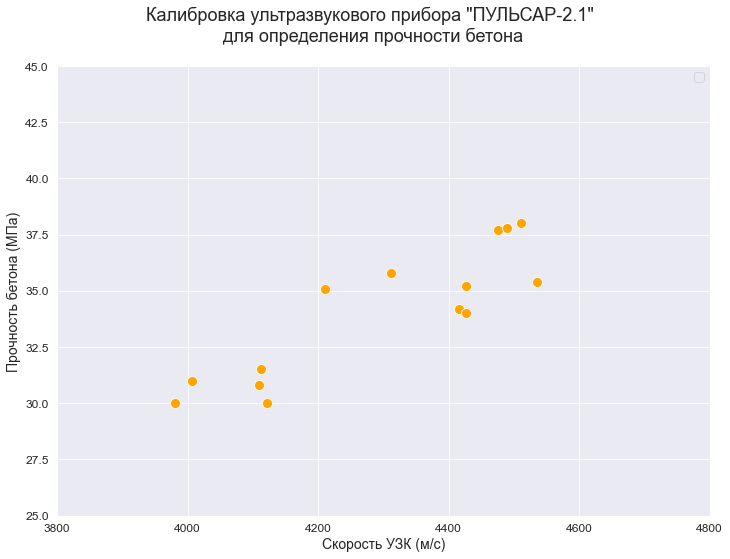

In [171]:
# Пользовательская функция
graph_scatterplot_sns(
    X, Y,
    Xmin=Xmin_graph, Xmax=Xmax_graph,
    Ymin=Ymin_graph, Ymax=Ymax_graph,
    color='orange',
    title_figure=Task_Project,
    x_label=Variable_Name_X,
    y_label=Variable_Name_Y,
    s=100,
    file_name='graph/scatterplot_XY_sns.png')

Существует универсальный набор графиков - гистограмма, коробчатая диаграмма, вероятностный график - которые позволяют исследователю сделать предварительные выводы о свойствах исходных данных.

Так как объем выборки невелик (n=14), строить гистограммы распределения переменных X и Y не имеет смысла, поэтому ограничимся построением коробчатых диаграмм и вероятностных графиков:

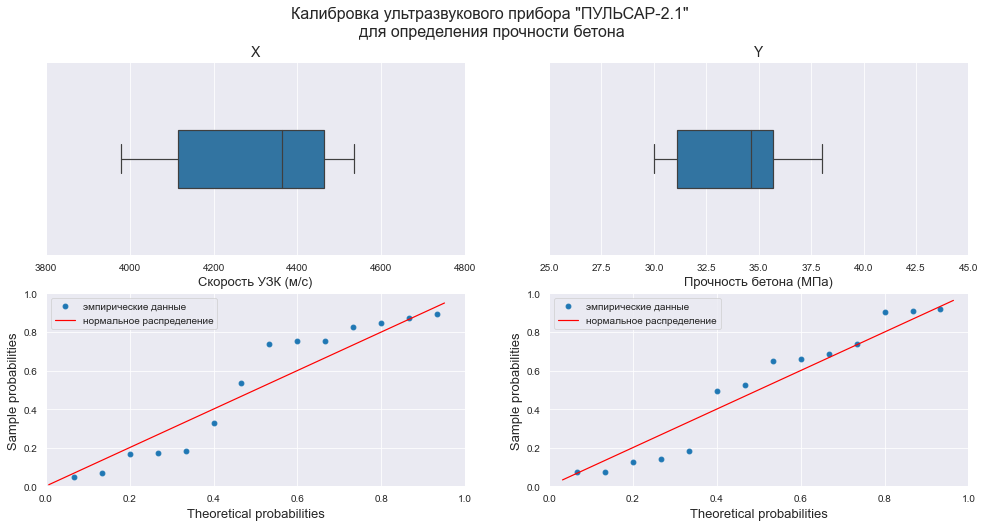

In [172]:
# Пользовательская функция
graph_hist_boxplot_probplot_XY_sns(
    data_X=X, data_Y=Y,
    data_X_min=Xmin_graph, data_X_max=Xmax_graph,
    data_Y_min=Ymin_graph, data_Y_max=Ymax_graph,  
    graph_inclusion='bp',    # выбираем для построения виды графиков: b - boxplot, p - probplot)
    data_X_label=Variable_Name_X,
    data_Y_label=Variable_Name_Y,
    title_figure=Task_Project,
    file_name='graph/hist_boxplot_probplot_XY_sns.png')    

Для сравнения характера распределений переменных X и Y возможно также построить совмещенную коробчатую диаграмму по стандартизованным данным:

,X,Y
0,0.6321,0.0587
1,-0.4413,0.3806
2,-0.9544,-0.9067
3,-0.9701,-1.1570
4,-0.9073,-1.4431
5,0.6897,-0.0128
6,1.2551,0.4878
7,0.0823,0.6309
8,1.1295,1.4175
9,0.9410,1.3103


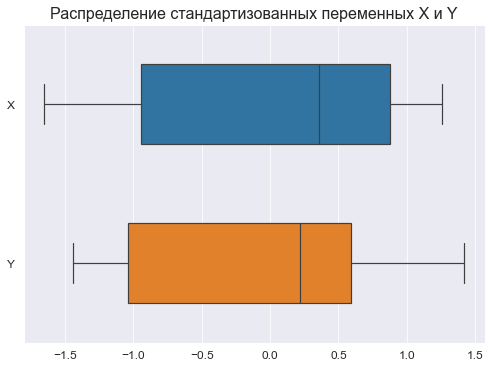

In [173]:
# стандартизуем исходные данные
standardize_df = lambda X: ((X - np.mean(X))/np.std(X))

dataset_df_standardize = dataset_df.copy()
dataset_df_standardize = dataset_df_standardize.apply(standardize_df)
display(dataset_df_standardize)

# построим график
fig, axes = plt.subplots(figsize=(210/INCH, 297/INCH/2))
axes.set_title("Распределение стандартизованных переменных X и Y", fontsize = 16)
sns.boxplot(
    data=dataset_df_standardize,    
    orient='h',
    width=0.5,
    ax=axes)
plt.show()

Графический анализ позволяет сделать следующие **<u>выводы</u>**:
1. Отсутствие выбросов на коробчатых диаграммах свидетельствует об однородности распределения переменных.
2. Смещение медианы вправо на коробчатых диаграммах свидетельствует о левосторонней асимметрии распределения.

### <center> <u> <font size="5"> ***ДЕСКРИПТИВНАЯ (ОПИСАТЕЛЬНАЯ) СТАТИСТИКА***

Собственно говоря, данный этап требуется проводить далеко не всегда, однако с помощью статистических характеристик выборки мы тоже можем сделать полезные выводы.

Описательная статистика исходных данных средствами библиотеки **Pandas** - самый простой вариант:

In [174]:
dataset_df.describe()

,X,Y
count,14.0000,14.0000
mean,4295.2857,34.0357
std,198.1967,2.9021
min,3980.0000,30.0000
25%,4115.2500,31.1250
50%,4363.5000,34.6500
75%,4463.0000,35.7000
max,4535.0000,38.0000


Описательная статистика исходных данных средствами библиотеки **statsmodels** - более развернутый вариант, с большим количеством показателей:

In [175]:
from statsmodels.stats.descriptivestats import Description
result = Description(
    dataset_df,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=a_level,
    use_t=True)
display(result.summary())

nobs,14.0,14.0
missing,0.0,0.0
mean,4295.285714285715,34.035714285714285
std_err,14.156903574435972,0.20729640278971
upper_ci,4325.869845040467,34.48355093689829
lower_ci,4264.701583530962,33.58787763453028
std,198.1966500421036,2.9021496390559403
iqr,347.75,4.574999999999996
mad,175.5306122448979,2.416326530612245
coef_var,0.04614283268349769,0.08526777533427736
range,555.0,8.0


Описательная статистика исходных данных с помощью пользовательской функции **descriptive_characteristics**:

In [176]:
# Пользовательская функция
descriptive_characteristics(X)

,characteristic,evaluation,conf.int.low,conf.int.high,abs.err.,rel.err.(%),note
0,count,14.0000,,,,,
1,mean,4295.2857,4180.8504,4409.7211,52.9703,1.2332,
2,median,4363.5000,4113,4475,66.3884,1.5214,distribution is negative skewed (левосторонняя асимметрия) (mean < median)
3,mode,4416.0000,,,,,
4,variance,39281.9121,20644.9310,101954.5405,7423.5836,18.8982,
5,standard deviation,198.1967,143.6834,319.3032,37.4556,18.8982,
6,mean absolute deviation,175.5306,,,,,
7,min,3980.0000,,,,,
8,5%,3997.5500,,,,,
9,25% (Q1),4115.2500,,,,,


**<u>Выводы</u>**:
1. Сравнение показателей среднего арифметического (**mean**) и медианы (**median**) свидетельствует о **левосторонней асимметрии** (т.к.**mean** < **median**).
2. Значение коэффициента вариации **CV = 0.0445** и доверительный интервал для него **0.0336 ≤ CV ≤ 0.0657** свидетельствует об **однородности** исходных данных (т.к. **CV ≤ 0.33**).
3. Значение показателя асимметрии **skew (As) = -0.3101** свидетельствует об **умеренной левосторонней асимметрии** распределении (т.к. **|As| ≤ 0.5, As < 0**).
4. Значение показателя эксцесса **kurtosis (Es) = -1.4551** свидетельствует **о плосковершинном распределении (platykurtic distribution)** (т.к. **Es < 0**).

In [177]:
# Пользовательская функция
descriptive_characteristics(Y)

,characteristic,evaluation,conf.int.low,conf.int.high,abs.err.,rel.err.(%),note
0,count,14.0000,,,,,
1,mean,34.0357,32.3601,35.7114,0.7756,2.2789,
2,median,34.6500,31.0000,35.8000,0.9721,2.8055,distribution is negative skewed (левосторонняя асимметрия) (mean < median)
3,mode,30.0000,,,,,
4,variance,8.4225,4.4265,21.8602,1.5917,18.8982,
5,standard deviation,2.9021,2.1039,4.6755,0.5485,18.8982,
6,mean absolute deviation,2.4163,,,,,
7,min,30.0000,,,,,
8,5%,30.0000,,,,,
9,25% (Q1),31.1250,,,,,


**<u>Выводы</u>**:
1. Сравнение показателей среднего арифметического (**mean**) и медианы (**median**) свидетельствует о **левосторонней асимметрии** (т.к.**mean** < **median**).
2. Значение коэффициента вариации **CV = 0.0822** и доверительный интервал для него **0.06202 ≤ CV ≤ 0.1217** свидетельствует об **однородности** исходных данных (т.к. **CV ≤ 0.33**).
3. Значение показателя асимметрии **skew (As) = -0.1109** свидетельствует о **приблизительно симметричном** распределении (т.к. **|As| ≤ 0.25**).
4. Значение показателя эксцесса **kurtosis (Es) = -1.3526** свидетельствует **о плосковершинном распределении (platykurtic distribution)** (т.к. **Es < 0**).

### <center> <u> <font size="5"> ***ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ***

Для проверки нормальности распределения использована пользовательская функция **norm_distr_check**, которая объединяет в себе набор стандартных статистических тестов проверки нормальности. Все тесты относятся к стандартному инструментарию **Pyton** (библиотека **scipy**, модуль **stats**), за исключением теста Эппса-Палли (Epps-Pulley test); о том, как реализовать этот тест средствами **Pyton** я писал в своей статье https://habr.com/ru/post/685582/.

Примечание: для использования функции **norm_distr_check** в каталог с **ipynb**-файлом необходимо поместить папку **table** c файлом **Tep_table.csv**, который содержит табличные значения статистики критерия Эппса-Палли.

In [178]:
# пользовательская функция
norm_distr_check(X)

C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.0755,True,0.8879,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,,-,0.2856,0.3636,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.1125,True,4.3695,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.6452,0.6800,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,-,-,-,,,count less than 50
5,Lilliefors test,0.9500,0.0500,0.0456,False,0.2288,,,not gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,-,-,-,,,count less than 40
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.5406,True,-0.6118,,,gaussian distribution


In [179]:
# Пользовательская функция
norm_distr_check (Y)

C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.1245,True,0.9029,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,,-,0.1542,0.3636,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.2387,True,2.8653,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.4959,0.6800,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,-,-,-,,,count less than 50
5,Lilliefors test,0.9500,0.0500,0.3733,True,0.1660,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,-,-,-,,,count less than 40
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.8258,True,-0.2201,,,gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов позволяют принять гипотезу о нормальности распределения переменных **X** и **Y**.

### <center> <u> <font size="5"> ***ПРОВЕРКА АНОМАЛЬНЫХ ЗНАЧЕНИЙ (ВЫБРОСОВ)***

Статистическую проверку аномальных значений (выбросов) не стоит путать с проверкой выбросов, которая проводится на этапе первичной обработки результатов наблюдений. Последняя проводится с целью отсеять явные ошибочные данные (например, в результате неправильно поставленной запятой величина показателя может увеличиться/уменьшиться на порядок); здесь же мы говорим о <u>статистической проверке</u> данных, которые уже прошли этап первичной обработки.

Имеется довольно много критериев для проверки аномальных значений (подробнее см.[1]); вообще данная процедура довольно неоднозначная:
* критерии зависят от вида распределения;
* мало данных о сравнительной мощности этих критериев;
* даже в случае принятии гипотезы о нормальном распределении в выборке могут быть обнаружены аномальные значения и пр.

Кроме существует дилемма: если какие-то значения в выборке признаны выбросами - стоит или не стоит исследователю исключать их? Ведь каждое значение несет в себе информацию, причем иногда весьма ценную, а сильно отклоняющиеся от основного массива данные (которые не являются выбросами в смысле первичной обработки, но являются статистическим значимыми аномальными значениями) могут кардинально изменить статистический вывод.

В общем, о задаче выявления аномальных значений (выбросов) можно написать отдельно, а пока, в данном разборе, ограничимся проверкой аномальных значений по критерию **наибольшего максимального отклонения** (см.[1, с.547]) с помощью пользовательской функции **detecting_outliers_mad_test**. Данные функция возвращает DataFrame, которые включает список аномальных значений со следующими признаками:
* **value** - проверяемое значение из выборки
* **mad_calc** и **mad_table** - расчетное и табличное значение статистики критерия
* **outlier_conclusion** - вывод (выброс или нет)

Обращаю внимание, что критерий **наибольшего максимального отклонения** можно использовать только для <u>нормально распределенных данных</u>.

In [180]:
# пользовательская функция
print("Проверка наличия выбросов переменной X:\n")
result = detecting_outliers_mad_test(X)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

Проверка наличия выбросов переменной X:



,value,mad_calc,mad_table,outlier_conclusion


In [181]:
# пользовательская функция
print("Проверка наличия выбросов переменной Y:\n")
result = detecting_outliers_mad_test(Y)
mask = (result['outlier_conclusion'] == 'outlier')
display(result[mask])

Проверка наличия выбросов переменной Y:



,value,mad_calc,mad_table,outlier_conclusion


<u>**Вывод:**</u> в случае обеих переменных **X** и **Y** список пуст, следовательно, аномальных значений (выбросов) не выявлено.

### <center> <u> <font size="5"> ***КОРРЕЛЯЦИОННЫЙ АНАЛИЗ***

Корреляционный анализ - это разведка перед построением регрессионной модели.

Выполним расчет коэффициента линейной корреляции Пирсона, проверку его значимости и построение доверительных интервалов с помощью пользовательской функции **corr_coef_check** (про эту функцию более подробно написано в моей статье https://habr.com/ru/post/683442/):

In [182]:
# пользовательская функция
display(corr_coef_check(X, Y, scale='Evans'))

,notation,coef_value,coef_value_squared,p_level,a_level,t_calc,t_table,t_calc >= t_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high,scale
Correlation coef.,r,0.8900,0.7920,0.9500,0.0500,6.7600,2.1788,True,0.0000,True,significance,0.6621,0.9625,Evans: very strong (0.8 < |r| <= 1.0)


<u>**Выводы:**</u>
1. Значение коэффициента корреляции **coef_value = 0.8900** свидетельствует о весьма сильной корреляционной связи (по шкале Эванса).
2. Коэффициент корреляции значим по критерию Стьюдента: **t_calc ≥ t_table**, **a_calc ≤ a_level**.
3. Доверительный интервал для коэффициента корреляции: **0.6621 ≤ coef_value ≤ 0.9625**.

### <center> <u> <font size="5"> ***РЕГРЕССИОННЫЙ АНАЛИЗ***

#### <center> ***ПАРНАЯ ЛИНЕЙНАЯ РЕГРЕССИОННАЯ МОДЕЛЬ***

#### <center> ***Библиотека statsmodels***  

<font size="5"> <u>**Предварительная визуализация**</u>

**python** позволяет выполнить предварительную визуализацию, например, с помощью функции **jointplot** библиотеки **seaborn**:

<Figure size 841.89x595.276 with 0 Axes>

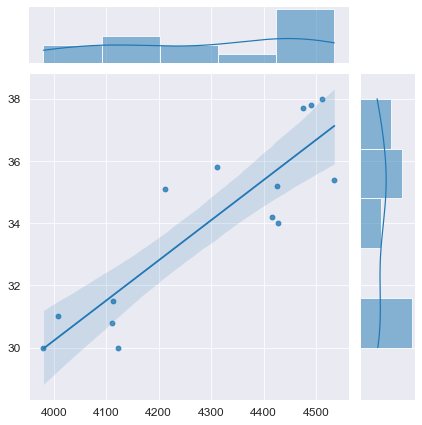

In [183]:
fig = plt.figure(figsize=(297/INCH, 210/INCH))
axes = sns.jointplot(
    x=X, y=Y,
    kind='reg',
    ci=95)
plt.show()

<font size="5"> <u>**Построение модели**</u>

Выполним оценку параметров и анализ **простой линейной регрессии (simple linear regression)**, используя библиотеку **statsmodels** (https://www.statsmodels.org/) и входящий в нее модуль линейной регрессии **Linear Regression** (https://www.statsmodels.org/stable/regression.html).

Данный модуль включает в себя классы, реализующие различные методы оценки параметров моделей линейной регрессии, в том числе:
* класс **OLS** (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) - **Ordinary Least Squares** (обычный метод наименьших квадратов).
* класс **WLS** (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.WLS.html#statsmodels.regression.linear_model.WLS) - **Weighted Least Squares** (метод взвешенных наименьших квадратов) (https://en.wikipedia.org/wiki/Weighted_least_squares), применяется, если имеет место **гетероскедастичность данных** (https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C).
* класс **GLS** (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.GLS.html#statsmodels.regression.linear_model.GLS) - **Generalized Least Squares** (обобщенный метод наименьших квадратов) (https://en.wikipedia.org/wiki/Generalized_least_squares), применяется, если существует определенная степень корреляции между остатками в модели регрессии.
* класс **GLSAR** (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.GLSAR.html#statsmodels.regression.linear_model.GLSAR) -  **Generalized Least Squares with AR covariance structure** (обобщенный метод наименьших квадратов, ковариационная структура с автокорреляцией - экспериментальный метод)
* класс **RecurciveLS** (https://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html) - **Recursive least squares** (рекурсивный метод наименьших квадратов) (https://en.wikipedia.org/wiki/Recursive_least_squares_filter)
* классы **RollingOLS** (https://www.statsmodels.org/stable/generated/statsmodels.regression.rolling.RollingOLS.html#statsmodels.regression.rolling.RollingOLS) и **RollingWLS** (https://www.statsmodels.org/stable/generated/statsmodels.regression.rolling.RollingWLS.html#statsmodels.regression.rolling.RollingWLS) - скользящая регрессия (https://www.statsmodels.org/stable/examples/notebooks/generated/rolling_ls.html, https://help.fsight.ru/ru/mergedProjects/lib/01_regression_models/rolling_regression.htm)<br>
  и т.д.

Так как исходные данные подчиняются нормальному закону распределения и аномальные значения (выбросы) отсутствуют, воспользуемся для оценки параметров обычным методом наименьших квадратов (класс **OLS**):

In [184]:
model_linear_ols = smf.ols(formula='Y ~ X', data=dataset_df)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     41.61
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           3.16e-05
Time:                        15:08:09   Log-Likelihood:                -23.785
No. Observations:                  14   AIC:                             51.57
Df Residuals:                      12   BIC:                             52.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.3741      8.599     -2.486      0.0

C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Альтернативная форма выдачи результатов:

In [185]:
print(result_linear_ols.summary2())

C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.757   
Dependent Variable: Y                AIC:                51.5708 
Date:               2022-09-27 15:08 BIC:                52.8489 
No. Observations:   14               Log-Likelihood:     -23.785 
Df Model:           1                F-statistic:        41.61   
Df Residuals:       12               Prob (F-statistic): 3.16e-05
R-squared:          0.776            Scale:              2.0425  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -21.3741    8.5988  -2.4857  0.0287  -40.1093  -2.6390
X             0.0129    0.0020   6.4503  0.0000    0.0085   0.0173
-----------------------------------------------------------------
Omnibus:              3.466        Durbin-Watson:           1.443
Prob(Omnibus):        

Результаты построения модели мы получаем как класс **statsmodels.regression.linear_model.RegressionResults** (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults).

<u>**Экспресс-выводы**</u>, которые мы можем сразу сделать из результатов построения модели:

1. Коэффициенты регрессии модели Y = b0 + b1∙X:
    - **Intercept = b0 = -21.3741**<br>
    - **b1 = 0.0129**<br>
<br>

2. Коэффициент детерминации **R-squared = 0.776**, его скорректированная оценка **Adj. R-squared = 0.757** - это означает, что регрессионная модуль объясняет 75.75% вариации переменной Y.
<br>

3. Проверка значимости коэффициента детерминации:
    - расчетное значение статистики критерия Фишера: **F-statistic = 41.61**
    - расчетный уровень значимости **Prob (F-statistic) = 3.16e-05**
    - так как значение **Prob (F-statistic) < 0.05**, то нулевая гипотеза **R-squared = 0** НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ<br>
<br>  

4. Проверка значимости коэффициентов регрессии:
    - расчетный уровень значимости **P>|t|** не превышает **0.05** - это означает, что оба коэффициента регрессии значимы
    - об этом же свидетельствует то, что доверительный интервал для обоих коэффициентов регрессии (**[0.025; 0.975]**) не включает в себя точку **0**<br>
    
    Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка **Std.Err.** расчетное значение статистики критерия Стьюдента **t** для проверки гипотезы о значимости.
<br>

5. Анализ остатков модели:<br>
    * Тест **Omnibus** - про этот тест подробно написано в https://en.wikipedia.org/wiki/Omnibus_test, https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a, http://work.thaslwanter.at/Stats/html/statsModels.html.<br>
        Расчетное значение статистики критерия **Omnibus = 3.466** - по сути расчетное значение F-критерия (см. https://en.wikipedia.org/wiki/Omnibus_test).<br>
        **Prob(Omnibus) = 0.177** — показывает вероятность нормального распределения остатков (значение **1** указывает на совершенно нормальное распределение).<br>
        Учитывая, что в дальнейшем мы проверим нормальность распределения остатков по совокупности различных тестов, в том числе с достаточно высокой мощностью, и все тесты позволят принять гипотезу о нормальном распределении - в данном случае к тесту **Omnibus** возникают вопросы. С этим тестом нужно разбираться отдельно.
        
    * **Skew = 0.014** и **Kurtosis = 1.587** - показатели асимметрии и эксцесса остатков свидетельствуют, что распределение остатков практически симметричное, островершинное.
    
      * проверка нормальности распределения остатков по критерию Харке-Бера: расчетное значение статистики критерия **Jarque-Bera (JB) = 1.164** и расчетный уровень значимости **Prob(JB) = 0.559**. К данным результатам также возникают вопросы, особенно, если учесть, что критерий Харке-Бера является асимптотическим, расчетное значение имеет распределение хи-квадрат, поэтому данный критерий рекомендуют применять только для больших выборок (см. https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test).
        Проверку нормальности распределения остатков модели лучше проводить с использованием набора стандартных статистических тестов **python** (см. далее).<br>
        <br>

6. Проверка автокорреляции по критерию Дарбина-Уотсона: **Durbin-Watson = 1.443**.<br>
    Мы не будем здесь разбирать данный критерий, так как явление автокорреляции больше характерно для данных, выражаемых в виде временных рядов. Однако, для грубой оценки считается, что при расчетном значении статистики криетрия Дарбина=Уотсона а интервале **[1; 2]** автокорреляция отсутствует (см.https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic).<br>
    Более подробно про критерий Дарбина-Уотсона - см. [1, с.659].

<u>**Прочая информация**</u>, которую можно извлечь из результатов построения модели:
1. **Covariance Type** - тип ковариации, подробнее см. https://habr.com/ru/post/681218/, https://towardsdatascience.com/simple-explanation-of-statsmodel-linear-regression-model-summary-35961919868b#:~:text=Covariance%20type%20is%20typically%20nonrobust,with%20respect%20to%20each%20other.

2. **Scale** - масштабный коэффициент для ковариационной матрицы (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale), равен величине **Mean squared error (MSE)** (cреднеквадратической ошибке), об подробнее см. далее, в разделе про ошибки аппроксимации моделей.
   
3. Показатели сравнения качества различных моделей:
   - **Log-Likelihood** - логарифмическая функция правдоподобия, подробнее см. https://en.wikipedia.org/wiki/Likelihood_function#Log-likelihood, https://habr.com/ru/post/433804/
   - **AIC** - информационный критерий Акаике (**Akaike information criterion**), подробнее см. https://en.wikipedia.org/wiki/Akaike_information_criterion
   - **BIC** - информационный критерий Байеса (**Bayesian information criterion**), подробнее см. https://en.wikipedia.org/wiki/Bayesian_information_criterion
  
    В данной статье мы эти показатели рассматривать не будем, так как задача выбора одной модели из нескольких перед нами не стоит.

4. Число обусловленности **Cond. No = 96792** используется для проверки мультиколлинеарности (считается, что мультиколлинеарность есть, если значение **Cond. No > 30**) (см. http://work.thaslwanter.at/Stats/html/statsModels.html). В нашем случае парной регрессионной модели о мультиколлинеарности речь не идет.

Далее будем извлекать данные из стандартного набора выдачи результатов и анализировать их более подробно. Последующие этапы вовсе не обязательно проводить в полном объеме при решении задач, но здесь мы рассмотрим их подробно.

<font size="5"> <u>**Параметры и уравнение регрессионной модели**</u>

Извлечем параметры полученной модели - как свойство **params** модели:

In [186]:
print('Параметры модели: \n', result_linear_ols.params, type(result_linear_ols.params))

Параметры модели: 
 Intercept   -21.3741
X             0.0129
dtype: float64 <class 'pandas.core.series.Series'>


Имея параметры модели, можем формализовать уравнение модели **Y = b0 + b1*X**:

In [187]:
b0 = result_linear_ols.params['Intercept']
b1 = result_linear_ols.params['X']
Y_calc = lambda x: b0 + b1*x

<font size="5"> <u>**График регрессионной модели**</u>

Для построения графиков регрессионных моделей можно воспользоваться стандартными возможностями библиотек **statsmodels**, **seaborn**, либо создать пользовательскую функцию - на усмотрение исследователя:

**1. Построение графиков регрессионных моделей с использованием библиотеки **statsmodels****

С помощью функции **statsmodels.graphics.plot_fit** (https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html#statsmodels.graphics.regressionplots.plot_fit) - отображается график **Y and Fitted vs.X** (фактические и расчетные значения Y с доверительным интервалом для каждого значения Y):

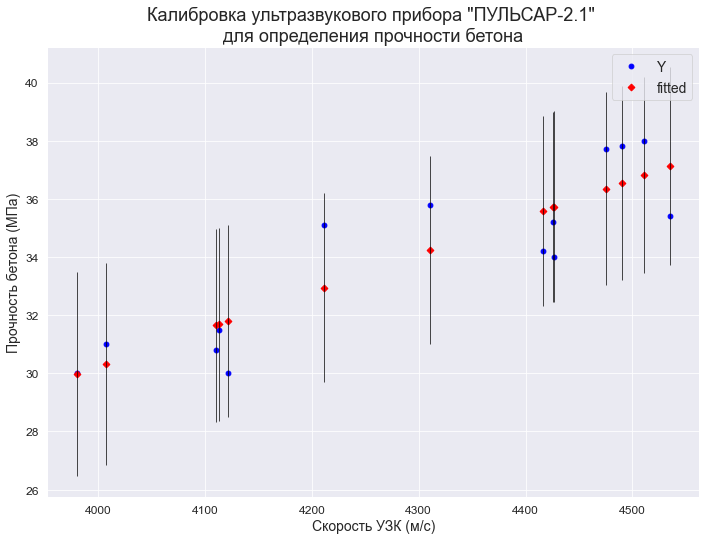

In [188]:
fig, ax = plt.subplots(figsize=(297/INCH, 210/INCH))
fig = sm.graphics.plot_fit(
    result_linear_ols, 'X',
    vlines=True,    # это параметр отвечает за отображение доверительных интервалов для Y
    ax=ax)
ax.set_ylabel(Variable_Name_Y)
ax.set_xlabel(Variable_Name_X)
ax.set_title(Task_Project)
plt.show()

С помощью функции **statsmodels.graphics.plot_regress_exog** (https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html#statsmodels.graphics.regressionplots.plot_regress_exog) - отображается область 2х2, которая содержит:
* предыдущий график **Y and Fitted vs.X**;
* график остатков **Residuals versus X**;
* график **Partial regression plot** - график частичной регрессии, пытается показать эффект добавления другой переменной в модель, которая уже имеет одну или несколько независимых переменных (более подробно см. https://en.wikipedia.org/wiki/Partial_regression_plot);
* график **CCPR Plot (Component-Component plus Residual Plot)** - еще один способ оценить влияние одной независимой переменной на переменную отклика, принимая во внимание влияние других независимых переменных (более подробно - см. https://towardsdatascience.com/calculating-price-elasticity-of-demand-statistical-modeling-with-python-6adb2fa7824d, https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/).

eval_env: 1


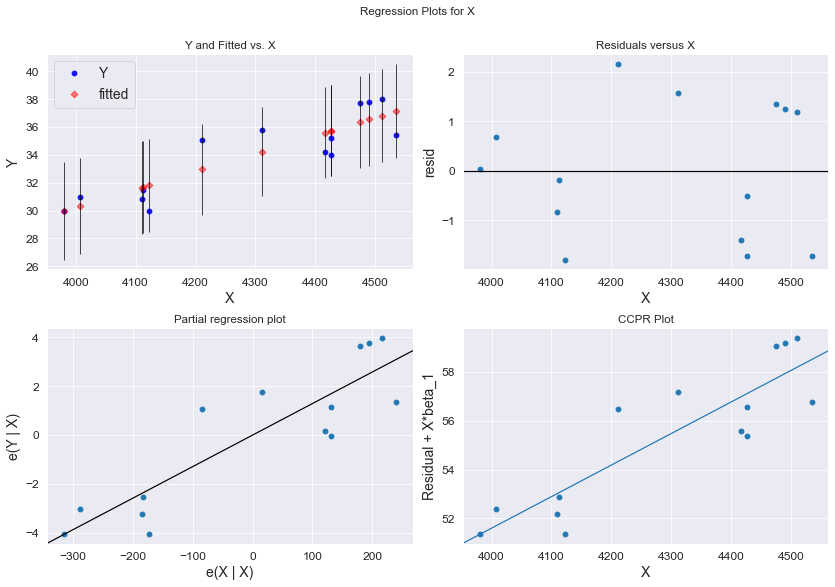

In [189]:
fig = plt.figure(figsize=(297/INCH, 210/INCH))
sm.graphics.plot_regress_exog(result_linear_ols, 'X', fig=fig)
plt.show()

**2. Построение графиков регрессионных моделей с использованием библиотеки **seaborn****

Воспользуемся модулем **regplot** библиотеки **seaborn** (https://seaborn.pydata.org/generated/seaborn.regplot.html). Данный модуль позволяет визуализировать различные виды регрессии:
* линейную
* полиномиальную
* логистическую
* взвешенную локальную регрессию (LOWESS - Locally Weighted Scatterplot Smoothing) (см. http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_LOWESS, https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)

Более подробно про модуль **regplot** можно прочитать в статье: https://pyprog.pro/sns/sns_8_regression_models.html.

Есть более совершенный модуль **lmplot** (https://seaborn.pydata.org/generated/seaborn.lmplot.html), который объединяет в себе **regplot** и **FacetGrid**, но мы его здесь рассматривать не будем.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


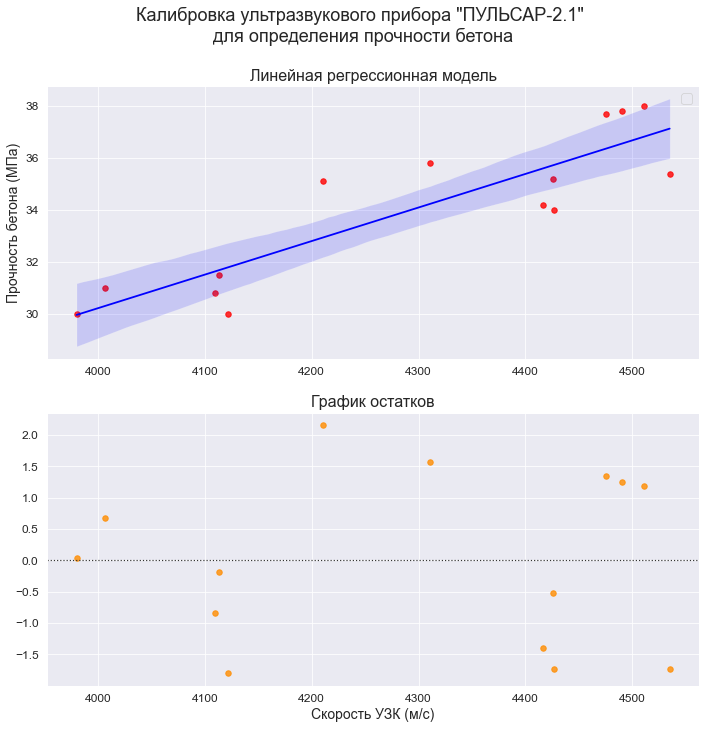

In [190]:
# создание рисунка (Figure) и области рисования (Axes)
fig = plt.figure(figsize=(297/INCH, 420/INCH/1.5))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
# заголовок рисунка (Figure)
title_figure = Task_Project
fig.suptitle(title_figure, fontsize = 18)
# заголовок области рисования (Axes)
title_axes_1 = 'Линейная регрессионная модель'
ax1.set_title(title_axes_1, fontsize = 16)
# график регрессионной модели
order_mod = 1    # порядок модели
#label_legend_regr_model = 'фактические данные'
sns.regplot(
    #data=dataset_df,
    x=X, y=Y,
    #x_estimator=np.mean,
    order=order_mod,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    ci=95,
    scatter_kws={'s': 30, 'color': 'red'},
    line_kws={'color': 'blue'},
    #label=label_legend_regr_model,
    ax=ax1)
ax1.set_ylabel(Variable_Name_Y)
ax1.legend()
# график остатков
title_axes_2 = 'График остатков'
ax2.set_title(title_axes_2, fontsize = 16)
sns.residplot(
    #data=dataset_df,
    x=X, y=Y,
    order=order_mod,
    lowess=False,
    robust=False,
    scatter_kws={'s': 30, 'color': 'darkorange'},
    ax=ax2)
ax2.set_xlabel(Variable_Name_X)

plt.show()

**3. Построение графиков регрессионных моделей с помощью пользовательской функции**

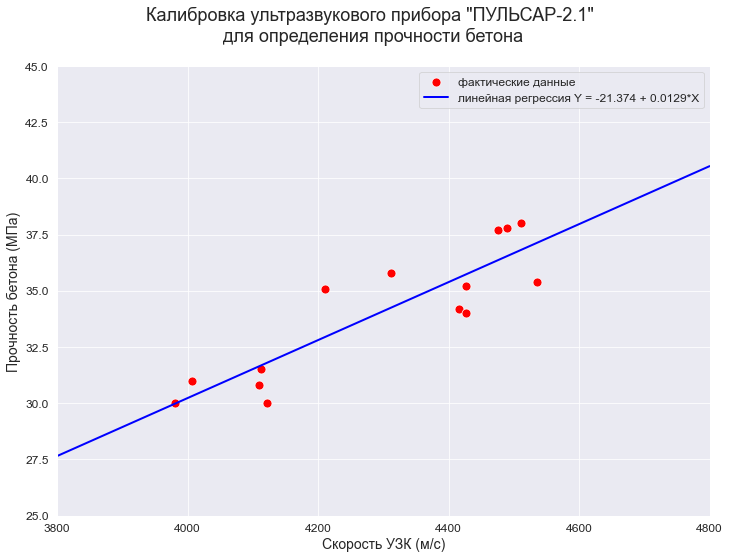

In [191]:
# Пользовательская функция
graph_regression_plot_sns(
    X, Y,
    regression_model=Y_calc,
    Xmin=Xmin_graph, Xmax=Xmax_graph,
    Ymin=Ymin_graph, Ymax=Ymax_graph,
    title_figure=Task_Project,
    x_label=Variable_Name_X,
    y_label=Variable_Name_Y,
    label_legend_regr_model=f'линейная регрессия Y = {b0:.3f} + {b1:.4f}*X',
    s=80,
    file_name='graph/regression_plot_sns.png')

<font size="5"> <u>**Статистический анализ регрессионной модели**</u>

**1. Расчет ошибки аппроксимации (Error Metrics)**

Ошибки аппроксимации (Error Metrics) позволяют получить общее представление о качестве модели, а также позволяют сравнивать между собой различные модели.

Создадим пользовательскую функцию, которая рассчитывает основные ошибки аппроксимации для заданной модели:
* **Mean squared error (MSE)** или **Mean squared deviation (MSD)** - среднеквадратическая ошибка (https://en.wikipedia.org/wiki/Mean_squared_error):
    
    ![Getting Started](Image/Image_09.png)

* **Root mean square error (RMSE)** или **Root mean square deviation (RMSD)** - квадратный корень из **MSE** (https://en.wikipedia.org/wiki/Root-mean-square_deviation): 
    
    ![Getting Started](Image/Image_10.png)
    
* **Mean absolute error (MAE)** - средняя абсолютная ошибка (https://en.wikipedia.org/wiki/Mean_absolute_error):

    ![Getting Started](Image/Image_11.png)

* **Mean squared prediction error (MSPE)** - среднеквадратическая ошибка прогноза (среднеквадратическая ошибка в процентах) (https://en.wikipedia.org/wiki/Mean_squared_prediction_error):
  
    ![Getting Started](Image/Image_12.png)

* **Mean absolute percentage error (MAPE)** - средняя абсолютная ошибка в процентах (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error):
    
    ![Getting Started](Image/Image_13.png)

Про выбор метрики см. также https://machinelearningmastery.ru/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-2-regression-metrics-d4a1a9ba3d74/.

In [192]:
# Пользовательская функция
def regression_error_metrics(model, model_name=''):
    model_fit = model.fit()
    Ycalc = model_fit.predict()
    n_fit = model_fit.nobs
    Y = model.endog
    
    MSE = (1/n_fit) * np.sum((Y-Ycalc)**2)
    RMSE = sqrt(MSE)
    MAE = (1/n_fit) * np.sum(abs(Y-Ycalc))
    MSPE = (1/n_fit) *  np.sum(((Y-Ycalc)/Y)**2)
    MAPE = (1/n_fit) *  np.sum(abs((Y-Ycalc)/Y))
        
    model_error_metrics = {
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'MSPE': MSPE,
        'MAPE': MAPE}
    
    result = pd.DataFrame({
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'MSPE': "{:.3%}".format(MSPE),
        'MAPE': "{:.3%}".format(MAPE)},
        index=[model_name])        
        
    return model_error_metrics, result

(model_error_metrics, result) = regression_error_metrics(model_linear_ols, model_name='linear_ols')
display(result)

,MSE,RMSE,MAE,MSPE,MAPE
linear_ols,1.7507,1.3232,1.1725,0.148%,3.405%


В литературе по прикладной статистике нет единого мнения о допустимом размере относительных ошибок аппроксимации: в одних источниках допустимой считается ошибка 5-7%, в других она может быть увеличена до 8-10%, и даже до 15%.

<u>**Вывод:**</u> модель хорошо аппроксимирует фактические данные (относительная ошибка аппроксимации **MAPE = 3.405% < 10%**).

**2. Дисперсионный анализ регрессионной модели (ДАРМ)**

ДАРМ не входит в стандартную форму выдачи результатов **Regression Results**, однако я решил написать здесь о нем по двум причинам:
1. Именно анализ дисперсии регрессионной модели, разложение этой дисперсии на составляющие дает фундаментальное представление о сути регрессии, а термины, используемые при ДАРМ, применяются на последующих этапах анализа.
2. С терминами ДАРМ в литературе по прикладной статистике имеется некоторая путаница, в разных источниках они могут именоваться по-разному (см., например, [8, с.52]), поэтому, чтобы двигаться дальше, необходимо определиться с понятиями.

При ДАРМ общую вариацию результативного признака (**Y**) принято разделять на две составляющие - вариация, обусловленная регрессией и вариация, обусловленная отклонениями от регрессии (остаток), при этом в разных источниках эти термины могут именоваться и обозначаться по-разному, например:
1. **Вариация, обусловленная регрессией** - может называться **Explained sum of squares (ESS)**, **Sum of Squared Regression (SSR)** (https://en.wikipedia.org/wiki/Explained_sum_of_squares, https://towardsdatascience.com/anova-for-regression-fdb49cf5d684), **Sum of squared deviations (SSD)**.
2. **Вариация, обусловленная отклонениями от регрессии (остаток)** - может называться **Residual sum of squares (RSS)**, **Sum of squared residuals (SSR)**, **Squared estimate of errors, Sum of Squared Error (SSE)** (https://en.wikipedia.org/wiki/Residual_sum_of_squares, https://towardsdatascience.com/anova-for-regression-fdb49cf5d684); в отчественной практике также применяется термин **остаточная дисперсия**.
3. **Общая (полная) вариация** - может называться **Total sum of squares (TSS)**, **Sum of Squared Total (SST)** (https://en.wikipedia.org/wiki/Partition_of_sums_of_squares, https://towardsdatascience.com/anova-for-regression-fdb49cf5d684).

Как видим, путаница знатная:
* в разных источниках под **SSR** могут подразумеваться различные показатели;
* легко перепутать показатели **ESS** и **SSE**;
* в библиотеке **statsmodel** также есть смешение терминов: для показателя **Explained sum of squares** используется свойство **ess**, а для показателя **Sum of squared (whitened) residuals** - свойство **ssr**.

Мы будем пользоваться системой обозначений, принятой в большинстве источников - **SSR (Sum of Squared Regression)**, **SSE (Sum of Squared Error)**, **SST (Sum of Squared Total)**. Стандартная таблица ДАРМ в этом случае имеет вид:

![Getting Started](Image/Image_14.png)

Примечания:
1. Здесь приведена таблица ДАРМ для множественной линейной регрессионной модели (МЛРМ), в нашем случае при ПЛРМ мы имеем частный случай **p=1**.
2. Показатели **Fcalc-ad** и **Fcalc-det** - расчетные значения статистики критерия Фишера при проверке адекватности модели и значимости коэффициента детерминации (об этом - см.далее).

Более подробно про дисперсионный анализ регрессионной модели - см.[4, глава 3].

Класс **statsmodels.regression.linear_model.RegressionResults** позволяет нам получить данные для ANOVA (см. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) как свойства класса:
1. **Сумма квадратов, обусловленная регрессией / SSR (Sum of Squared Regression)** - свойство **ess**.
2. **Сумма квадратов, обусловленная отклонением от регрессии / SSE (Sum of Squared Error)** - свойство **ssr**.
3. **Общая (полная) сумма квадратов / SST (Sum of Squared Total)** - свойство **centered_tss**.
4. **Кол-во наблюдений / Number of observations** - свойство **nobs**.
5. **Число степеней свободы модели** / **Model degrees of freedom** - равно числу переменных модели (за исключением константы, если она присутствует - свойство **df_model**.
6. **Среднеквадратичная ошибка модели / Mean squared error the model** - сумма квадратов, объясненная регрессией, деленная на число степеней свободы регрессии - свойство **mse_model**.
7. **Среднеквадратичная ошибка остатков / Mean squared error of the residuals** - сумма квадратов остатков, деленная на остаточные степени свободы - свойство **mse_resid**.
8. **Общая среднеквадратичная ошибка / Total mean squared error** - общая сумма квадратов, деленная на количество наблюдений - свойство **mse_total**.

In [193]:
# SSR (Sum of Squared Regression)
# The explained sum of squares (in statsmodels user guide)
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.ess.html#statsmodels.regression.linear_model.RegressionResults.ess
SSR = result_linear_ols.ess
print(f'Sum of Squared Regression: SSR = result_linear_ols.ess = {SSR}')

# SSE (Sum of Squared Error)
# Sum of squared (whitened) residuals (in statsmodels user guide)
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.ssr.html#statsmodels.regression.linear_model.RegressionResults.ssr
SSE = result_linear_ols.ssr
print(f'Sum of Squared Error: SSE = result_linear_ols.ssr = {SSE}')

# SST (Sum of Squared Total)
# The total (weighted) sum of squares (in statsmodels user guide)
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.centered_tss.html#statsmodels.regression.linear_model.RegressionResults.centered_tss
SST = result_linear_ols.centered_tss
print(f'Sum of Squared Total: SST = result_linear_ols.centered_tss = {SST}\n')

# Number of observations n / Кол-во наблюдений
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.nobs.html#statsmodels.regression.linear_model.RegressionResults.nobs
n = int(result_linear_ols.nobs)
print(f'Number of observations: n = result_linear_ols.nobs = {n}')

# Model degrees of freedom. The number of regressors p. Does not include the constant if one is present (in statsmodels user guide)
# Число степеней свободы регрессии, равно числу переменных модели (за исключением константы, если она присутствует)
p = int(result_linear_ols.df_model)
print(f'Model degrees of freedom: p = result_linear_ols.df_model = {p}')

# Residual degrees of freedom. n - p - 1, if a constant is present. n - p if a constant is not included (in statsmodels user guide)
# Число степеней свободы остатков, равно n - p - 1, если константа присутствует, и n - p константа не включена в модель.
print(f'Residual degrees of freedom: n - p - 1 = {n - p - 1}\n')

# Mean squared error the model. The explained sum of squares divided by the model degrees of freedom (in statsmodels user guide)
# Среднеквадратичная ошибка модели. Сумма квадратов, объясненная регрессией, деленная на число степеней свободы регрессии.
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.mse_model.html#statsmodels.regression.linear_model.RegressionResults.mse_model

print(f'Mean squared error the model: MSR = result_linear_ols.mse_model = {result_linear_ols.mse_model}')

# Mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom (in statsmodels user guide)
# Среднеквадратичная ошибка остатков. Сумма квадратов остатков, деленная на остаточные степени свободы
# https://translate.yandex.ru/?lang=en-ru&text=Mean%20squared%20error%20of%20the%20residuals.%20The%20sum%20of%20squared%20residuals%20divided%20by%20the%20residual%20degrees%20of%20freedom

print(f'Mean squared error of the residuals: MSE = result_linear_ols.mse_resid = {result_linear_ols.mse_resid}')

# Total mean squared error. The uncentered total sum of squares divided by the number of observations (in statsmodels user guide)
# Общая среднеквадратичная ошибка. Общая сумма квадратов, деленная на количество наблюдений
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.mse_total.html#statsmodels.regression.linear_model.RegressionResults.mse_total
print(f'Total mean squared error: MST = result_linear_ols.mse_total = {result_linear_ols.mse_total}\n')

# Проверка расчетов среднеквадратических ошибок
print(f'SSR / p = {result_linear_ols.ess / (result_linear_ols.df_model)}')
print(f'SSE / (n-p-1) = {result_linear_ols.ssr / (result_linear_ols.nobs - result_linear_ols.df_model - 1)}')
print(f'SST / (n-1) = {result_linear_ols.centered_tss / (result_linear_ols.nobs-1)}')

Sum of Squared Regression: SSR = result_linear_ols.ess = 84.98181542125675
Sum of Squared Error: SSE = result_linear_ols.ssr = 24.51032743588608
Sum of Squared Total: SST = result_linear_ols.centered_tss = 109.49214285714284

Number of observations: n = result_linear_ols.nobs = 14
Model degrees of freedom: p = result_linear_ols.df_model = 1
Residual degrees of freedom: n - p - 1 = 12

Mean squared error the model: MSR = result_linear_ols.mse_model = 84.98181542125675
Mean squared error of the residuals: MSE = result_linear_ols.mse_resid = 2.04252728632384
Total mean squared error: MST = result_linear_ols.mse_total = 8.422472527472525

SSR / p = 84.98181542125675
SSE / (n-p-1) = 2.04252728632384
SST / (n-1) = 8.422472527472525


Также имеется модуль **statsmodels.stats.anova.anova_lm**, который позволяет получить результаты ДАРМ (нескольких типов - 1, 2, 3):

In [194]:
# тип 1
print('The type of Anova test: 1')
display(sm.stats.anova_lm(result_linear_ols, typ=1))

# тип 2
print('The type of Anova test: 2')
display(sm.stats.anova_lm(result_linear_ols, typ=2))

# тип 3
print('The type of Anova test: 3')
display(sm.stats.anova_lm(result_linear_ols, typ=3))

The type of Anova test: 1


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0000,84.9818,84.9818,41.6062,0.0000
Residual,12.0000,24.5103,2.0425,NaN,NaN


The type of Anova test: 2


,sum_sq,df,F,PR(>F)
X,84.9818,1.0000,41.6062,0.0000
Residual,24.5103,12.0000,NaN,NaN


The type of Anova test: 3


,sum_sq,df,F,PR(>F)
Intercept,12.6204,1.0000,6.1788,0.0287
X,84.9818,1.0000,41.6062,0.0000
Residual,24.5103,12.0000,NaN,NaN


На мой взгляд, форма таблица результатов **statsmodels.stats.anova.anova_lm** не вполне удобна, поэтому сформируем ее самостоятельно, для чего создадим пользовательскую функцию **ANOVA_table_regression_model**:

In [195]:
# Пользовательская функция
def ANOVA_table_regression_model(model_fit):
    n = int(model_fit.nobs)
    p = int(model_fit.df_model)
    SSR = model_fit.ess
    SSE = model_fit.ssr
    SST = model_fit.centered_tss

    result = pd.DataFrame({
        'sources_of_variation': ('regression (SSR)', 'deviation from regression (SSE)', 'total (SST)'),
        'sum_of_squares': (SSR, SSE, SST),
        'degrees_of_freedom': (p, n-p-1, n-1)})
    result['squared_error'] = result['sum_of_squares'] / result['degrees_of_freedom']
    R2 = 1 - result.loc[1, 'sum_of_squares'] / result.loc[2, 'sum_of_squares']
    F_calc_adequacy = result.loc[2, 'squared_error'] / result.loc[1, 'squared_error']
    F_calc_determ_check = result.loc[0, 'squared_error'] / result.loc[1, 'squared_error']
    result['F-ratio'] = (F_calc_determ_check, F_calc_adequacy, '')
    
    return result

result = ANOVA_table_regression_model(result_linear_ols)
display(result)
print(f"R2 = 1 - SSE/SST = {1 - result.loc[1, 'sum_of_squares'] / result.loc[2, 'sum_of_squares']}")
print(f"F_calc_adequacy = MST / MSE = {result.loc[2, 'squared_error'] / result.loc[1, 'squared_error']}")
print(f"F_calc_determ_check = MSR / MSE = {result.loc[0, 'squared_error'] / result.loc[1, 'squared_error']}")

,sources_of_variation,sum_of_squares,degrees_of_freedom,squared_error,F-ratio
0,regression (SSR),84.9818,1,84.9818,41.6062
1,deviation from regression (SSE),24.5103,12,2.0425,4.1236
2,total (SST),109.4921,13,8.4225,


R2 = 1 - SSE/SST = 0.7761453306483798
F_calc_adequacy = MST / MSE = 4.12355447286649
F_calc_determ_check = MSR / MSE = 41.60620814726438


ДАРМ позволяет визуализировать вариацию:

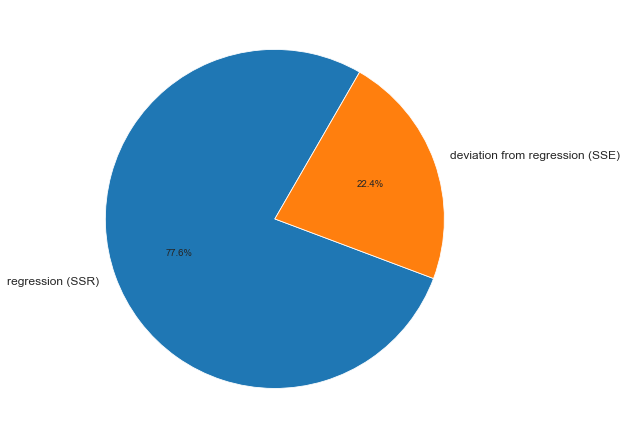

In [196]:
fig, axes = plt.subplots(figsize=(210/INCH, 297/INCH/1.5))
axes.pie(
    (result.loc[0, 'sum_of_squares'], result.loc[1, 'sum_of_squares']), 
    labels=(result.loc[0, 'sources_of_variation'], result.loc[1, 'sources_of_variation']),
    autopct='%.1f%%',
    startangle=60)
plt.show()

На основании данных ДАРМ мы рассчитали ряд показателей (**R2**, **Fcalc-ad** и **Fcalc-det**), которые будут использоваться в дальнейшем.

**3. Анализ остатков (проверка нормальности распределения остатков и гипотезы о равенстве нулю среднего значения остатков)**

Проверка нормальности распределения остатков - один их важнейших этапов анализа регрессионной модели. Требование нормальности распределения остатков не требуется для отыскания параметров модели, но необходимо в дальнейшем для проверки статистических гипотез с использованием критериев Фишера и Стьюдента (проверка адекватности модели, значимости коэффициента детерминации, значимости коэффициентов регрессии) и построения доверительных интервалов [5, с.122].

Остатки регрессионной модели:

In [197]:
print('Остатки регрессионной модели:\n', result_linear_ols.resid, type(result_linear_ols.resid))
res_Y = np.array(result_linear_ols.resid)

Остатки регрессионной модели:
 0    -1.3929
1     2.1516
2    -0.1842
3    -0.8455
4    -1.8003
5    -1.7348
6    -1.7281
7     1.5616
8     1.1815
9     1.3459
10    0.0315
11    1.2524
12    0.6832
13   -0.5219
dtype: float64 <class 'pandas.core.series.Series'>


**statsmodels** может выдавать различные преобразованные виды остатков (см. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.resid_pearson.html, https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.wresid.html).

График остатков:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


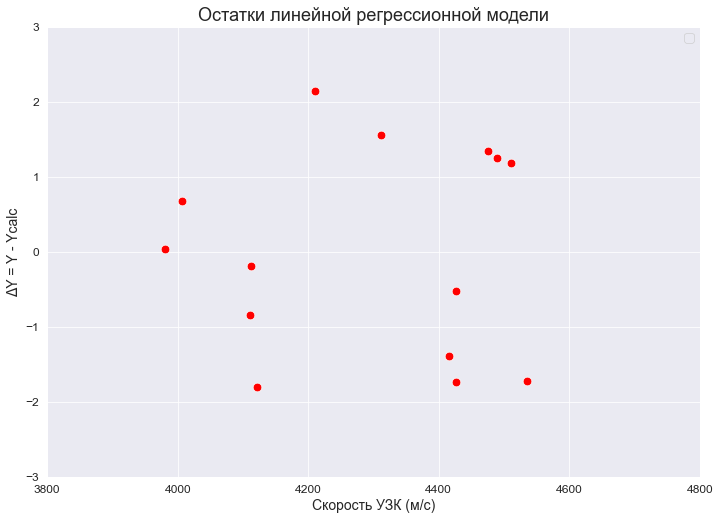

In [198]:
# Пользовательская функция
graph_scatterplot_sns(
    X, res_Y,
    Xmin=Xmin_graph, Xmax=Xmax_graph,
    Ymin=-3.0, Ymax=3.0,
    color='red',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели', title_axes_fontsize=18,
    x_label=Variable_Name_X,
    y_label='ΔY = Y - Ycalc',
    s=75,
    file_name='graph/residuals_plot_sns.png')

Проверка нормальности распределения остатков:

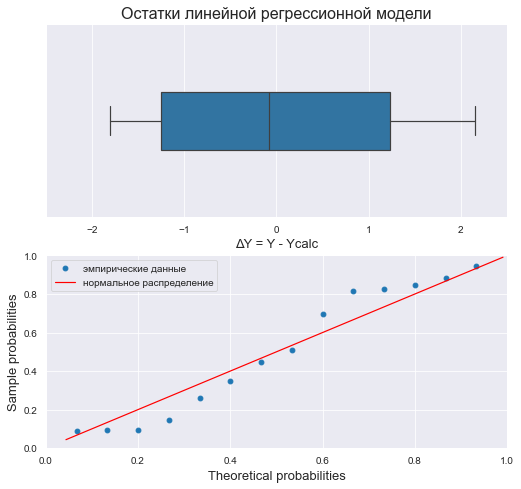

In [199]:
# Пользовательская функция
graph_hist_boxplot_probplot_sns(
    data=res_Y,
    data_min=-2.5, data_max=2.5,
    graph_inclusion='bp',
    data_label='ΔY = Y - Ycalc',
    #title_figure=Task_Project,
    title_axes='Остатки линейной регрессионной модели', title_axes_fontsize=16,
    file_name='graph/residuals_hist_boxplot_probplot_sns.png')    

In [200]:
norm_distr_check(res_Y)

C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.9500,0.0500,0.2122,True,0.9189,,,gaussian distribution
1,Epps-Pulley test,0.9500,0.0500,,-,0.1670,0.3636,True,gaussian distribution
2,D'Agostino's K-squared test,0.9500,0.0500,0.1768,True,3.4657,,,gaussian distribution
3,Anderson-Darling test,0.9500,0.0500,,,0.4132,0.6800,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.9500,0.0500,-,-,-,,,count less than 50
5,Lilliefors test,0.9500,0.0500,0.4066,True,0.1624,,,gaussian distribution
6,Cramér–von Mises test,0.9500,0.0500,-,-,-,,,count less than 40
7,Chi-squared test,0.9500,0.0500,-,-,-,,,count less than 100
8,Jarque–Bera test,0.9500,0.0500,-,-,-,,,count less than 2000
9,skewtest,0.9500,0.0500,0.9772,True,0.0286,,,gaussian distribution


<u>**Вывод:**</u> большинство статистических тестов позволяют принять гипотезу о нормальности распределения остатков.

Проверка гипотезы о равенстве нулю среднего значения остатков - так как остатки имеют нормальное распределение, воспользуемся критерием Стьюдента (функция **scipy.stats.ttest_1samp**, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html):

In [201]:
sps.ttest_1samp(res_Y, popmean=0)

Ttest_1sampResult(statistic=-8.090570966442683e-14, pvalue=0.9999999999999367)

<u>**Вывод:**</u> так как расчетный уровень значимости превышает заданный (0.05), то нулевая гипотеза о равенстве нулю остатков ПРИНИМАЕТСЯ.

**4. Проверка адекватности модели**

Суть проверки адекватности регрессионной модели заключается в сравнении полной дисперсии **MST** и остаточной дисперсии **MSE** - проверяется гипотеза о равенстве этих дисперсий по критерию Фишера. Если дисперсии различаются значимо, то модель считается адекватной. Более подробно про проверку адекватности регрессионной - см.[1, с.658], [2, с.49], [4, с.154].

Для проверки адекватности регрессионной модели создадим пользовательскую функцию **regression_model_adequacy_check**:

In [202]:
def regression_model_adequacy_check(
    model_fit,
    p_level: float=0.95,
    model_name=''):
    
    n = int(model_fit.nobs)
    p = int(model_fit.df_model)    # Число степеней свободы регрессии, равно числу переменных модели (за исключением константы, если она присутствует)
    
    SST = model_fit.centered_tss    # SST (Sum of Squared Total)
    dfT = n-1
    MST = SST / dfT

    SSE = model_fit.ssr    # SSE (Sum of Squared Error)
    dfE = n - p - 1
    MSE = SSE / dfE
    
    F_calc = MST / MSE
    F_table = sci.stats.f.ppf(p_level, dfT, dfE, loc=0, scale=1)
    a_calc = 1 - sci.stats.f.cdf(F_calc, dfT, dfE, loc=0, scale=1)
    conclusion_model_adequacy_check = 'adequacy' if F_calc >= F_table else 'adequacy'
    
    # формируем результат            
    result = pd.DataFrame({
        'SST': (SST),
        'SSE': (SSE),
        'dfT': (dfT),
        'dfE': (dfE),
        'MST': (MST),
        'MSE': (MSE),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_calc': (F_calc),
        'F_table': (F_table),
        'F_calc >= F_table': (F_calc >= F_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'adequacy_check': (conclusion_model_adequacy_check),
        },
        index=[model_name]
        )
    
    return result

regression_model_adequacy_check(result_linear_ols, p_level=0.95, model_name='linear_ols')

,SST,SSE,dfT,dfE,MST,MSE,p_level,a_level,F_calc,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,adequacy_check
linear_ols,109.4921,24.5103,13,12,8.4225,2.0425,0.9500,0.0500,4.1236,2.6602,True,0.0098,True,adequacy


<u>**Вывод:**</u> модель является АДЕКВАТНОЙ.

**5. Коэффициент детерминации и проверка его значимости**

Различают несколько видов коэффициента детерминации:
1. Собственно обычный **коэффициент детерминации**:
   
   ![Getting Started](Image/Image_15.png)

Его значение может быть получено как свойство **rsquared** модели.

2. **Скорректированный (adjusted) коэффициент детерминации** - используется для того, чтобы была возможность сравнивать модели с разным числом признаков так, чтобы число регрессоров (признаков) не влияло на статистику R2, при его расчете используются несмещённые оценки дисперсий:
   
    ![Getting Started](Image/Image_16.png)

Его значение может быть получено как свойство **rsquared_adj** модели.

3. **Обобщённый (extended) коэффициент детерминации** - используется для сравнения моделей регрессии со свободным членом и без него, а также для сравнения между собой регрессий, построенных с помощью различных методов: МНК, обобщённого метода наименьших квадратов (ОМНК), условного метода наименьших квадратов (УМНК), обобщённо-условного метода наименьших квадратов (ОУМНК). В данном разборе ПЛРМ рассматривать этот коэффициент мы не будем.

Более подробно с теорией вопроса можно ознакомиться, например: http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8), а также в [7].

Значения коэффициента детерминации и скорректированного коэффициента детерминации, извлеченные с помощью свойств **rsquared** и **rsquared_adj** модели.

In [203]:
print('R2 =', result_linear_ols.rsquared)
print('R2_adj =', result_linear_ols.rsquared_adj)

R2 = 0.7761453306483798
R2_adj = 0.7574907748690781


Значимость коэффициента детерминации можно проверить по критерию Фишера [3, с.201-203; 8, с.83].

Расчетное значение статистики критерия Фишера может быть получено с помощью свойства **fvalue** модели:

In [204]:
print(f"result_linear_ols.fvalue = {result_linear_ols.fvalue}")

result_linear_ols.fvalue = 41.60620814726438


Расчетный уровень значимости при проверке гипотезы по критерию Фишера может быть получено с помощью свойства **f_pvalue** модели:

In [205]:
print(f"result_linear_ols.f_pvalue = {result_linear_ols.f_pvalue}")

result_linear_ols.f_pvalue = 3.159037174286013e-05


Можно рассчитать уровень значимости самостоятельно (так сказать, для лучшего понимания и общей демонстрации возможностей) - для этого воспользуемся библиотекой **scipy**, модулем распределения Фишера **scipy.stats.f**, свойством **cdf** (функция распределения):

In [206]:
df1 = int(result_linear_ols.df_model)
df2 = int(result_linear_ols.nobs - result_linear_ols.df_model - 1)
F_calc = result_linear_ols.fvalue
a_calc = 1 - sci.stats.f.cdf(F_calc, df1, df2, loc=0, scale=1)
print(a_calc)

3.159037174282897e-05


Как видим, результаты совпадают.

Табличное значение статистики критерия Фишера получить с помощью **Regression Results** нельзя. Рассчитаем его самостоятельно - для этого воспользуемся библиотекой **scipy**, модулем распределения Стьюдента **scipy.stats.f**, свойством **ppf** (процентные точки):

In [207]:
F_table = sci.stats.f.ppf(p_level, df1, df2, loc=0, scale=1)
print(F_table)

4.747225346722511


Для удобства создадим пользовательскую функцию **determination_coef_check** для проверки значимости коэффициента детерминации, которая объединяет все вышеперечисленные расчеты:

In [208]:
# Пользовательская функция
def determination_coef_check(
    model_fit,
    p_level: float=0.95):
    
    a_level = 1 - p_level
    
    R2 = model_fit.rsquared
    R2_adj = model_fit.rsquared_adj
    n = model_fit.nobs    # объем выборки
    p = model_fit.df_model    # Model degrees of freedom. The number of regressors p. Does not include the constant if one is present.
    
    F_calc = R2 / (1 - R2) * (n-p-1)/p
    df1 = int(p)
    df2 = int(n-p-1)
    F_table = sci.stats.f.ppf(p_level, df1, df2, loc=0, scale=1)
    a_calc = 1 - sci.stats.f.cdf(F_calc, df1, df2, loc=0, scale=1)
    conclusion_determ_coef_sign = 'significance' if F_calc >= F_table else 'not significance'
        
    # формируем результат            
    result = pd.DataFrame({
        'notation': ('R2'),
        'coef_value (R)': (sqrt(R2)),
        'coef_value_squared (R2)': (R2),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_calc': (F_calc),
        'df1': (df1),
        'df2': (df2),
        'F_table': (F_table),
        'F_calc >= F_table': (F_calc >= F_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'significance_check': (conclusion_determ_coef_sign),
        'conf_int_low': (''),
        'conf_int_high': ('')
        },
        index=['Coef. of determination'])
    return result

determination_coef_check(
    result_linear_ols,
    p_level=0.95)

,notation,coef_value (R),coef_value_squared (R2),p_level,a_level,F_calc,df1,df2,F_table,F_calc >= F_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high
Coef. of determination,R2,0.8810,0.7761,0.9500,0.0500,41.6062,1,12,4.7472,True,0.0000,True,significance,,


<u>**Вывод:**</u> коэффициент детерминации ЗНАЧИМ.

**6. Коэффициенты регрессии и проверка их значимости**

Ранее мы уже извлекли коэффициенты регрессии как параметры модели **b0** и **b1** (как свойство **params** модели). Также можно получить их значения, как свойство **bse** модели:

In [209]:
print(b0, b1)
print(result_linear_ols.bse, type(result_linear_ols.bse))

-21.374148407090665 0.012900157609659589
Intercept   8.5988
X           0.0020
dtype: float64 <class 'pandas.core.series.Series'>


Значимость коэффициентов регрессии можно проверить по критерию Стьюдента [3, с.203-212; 8, с.78].

Расчетные значения статистики критерия Стьюдента могут быть получены с помощью свойства **tvalues** модели:

In [210]:
print(f"result_linear_ols.tvalues = \n{result_linear_ols.tvalues}")

result_linear_ols.tvalues = 
Intercept   -2.4857
X            6.4503
dtype: float64


Расчетные значения уровня значимости при проверке гипотезы по критерию Стьюдента могут быть получены с помощью свойства **pvalues** модели:

In [211]:
print(f"result_linear_ols.pvalues = \n{result_linear_ols.pvalues}")

result_linear_ols.pvalues = 
Intercept   0.0287
X           0.0000
dtype: float64


Доверительные интервалы для коэффициентов регрессии могут быть получены с помощью свойства **conf_int** модели:

In [212]:
print(result_linear_ols.conf_int(), '\n')

                 0       1
Intercept -40.1093 -2.6390
X           0.0085  0.0173 



Можно рассчитать уровень значимости самостоятельно (как ранее для критерия Фишера - для лучшего понимания и общей демонстрации возможностей) - для этого воспользуемся библиотекой **scipy**, модулем распределения Стьюдента **scipy.stats.t**, свойством **cdf** (функция распределения):

In [213]:
t_calc = result_linear_ols.tvalues
df = int(result_linear_ols.nobs - result_linear_ols.df_model - 1)
a_calc = 2*(1-sci.stats.t.cdf(abs(t_calc), df, loc=0, scale=1))
print(a_calc)

[2.8656e-02 3.1590e-05]


Как видим, результаты совпадают.

Табличные значения статистики критерия Стьюдента получить с помощью **Regression Results** нельзя. Рассчитаем их самостоятельно - для этого воспользуемся библиотекой **scipy**, модулем распределения Стьюдента **scipy.stats.t**, свойством **ppf** (процентные точки):

In [214]:
t_table = sci.stats.t.ppf((1 + p_level)/2 , df)
print(t_table)

2.1788128296634177


Для удобства создадим пользовательскую функцию **regression_coef_check** для проверки значимости коэффициентов регрессии, которая объединяет все вышеперечисленные расчеты:

In [215]:
def regression_coef_check(
    model_fit,
    notation_coef: list='',
    p_level: float=0.95):
    
    a_level = 1 - p_level
    
    # параметры модели (коэффициенты регрессии)
    model_params = model_fit.params
    # стандартные ошибки коэффициентов регрессии
    model_bse = model_fit.bse
    # проверка гипотезы о значимости регрессии
    t_calc = abs(model_params) / model_bse
    n = model_fit.nobs    # объем выборки
    p = model_fit.df_model    # Model degrees of freedom. The number of regressors p. Does not include the constant if one is present.
    df = int(n - p - 1)
    t_table = sci.stats.t.ppf((1 + p_level)/2 , df)
    a_calc = 2*(1-sci.stats.t.cdf(t_calc, df, loc=0, scale=1))
    conclusion_ = ['significance' if elem else 'not significance' for elem in (t_calc >= t_table).values]
        
    # доверительный интервал коэффициента регрессии
    conf_int_low = model_params - t_table*model_bse
    conf_int_high = model_params + t_table*model_bse
    
    # формируем результат            
    result = pd.DataFrame({
        'notation': (notation_coef),
        'coef_value': (model_params),
        'std_err': (model_bse),
        'p_level': (p_level),
        'a_level': (a_level),
        't_calc': (t_calc),
        'df': (df),
        't_table': (t_table),
        't_calc >= t_table': (t_calc >= t_table),
        'a_calc': (a_calc),
        'a_calc <= a_level': (a_calc <= a_level),
        'significance_check': (conclusion_),
        'conf_int_low': (conf_int_low),
        'conf_int_high': (conf_int_high),
        })
    
    return result

regression_coef_check(
    result_linear_ols,
    notation_coef=['b0', 'b1'],
    p_level=0.95)

,notation,coef_value,std_err,p_level,a_level,t_calc,df,t_table,t_calc >= t_table,a_calc,a_calc <= a_level,significance_check,conf_int_low,conf_int_high
Intercept,b0,-21.3741,8.5988,0.9500,0.0500,2.4857,12,2.1788,True,0.0287,True,significance,-40.1093,-2.6390
X,b1,0.0129,0.0020,0.9500,0.0500,6.4503,12,2.1788,True,0.0000,True,significance,0.0085,0.0173


<u>**Вывод:**</u> коэффициенты регрессии **b0** и **b1** ЗНАЧИМЫ.

**7. Проверка гетероскедастичности**

Для проверка гетероскедастичности **statsmodels** предлагает нам следующие инструменты:
* тест Голдфелда-Квандта (https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html#statsmodels.stats.diagnostic.het_goldfeldquandt) - теорию см. [Магнус, с.178], также https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%93%D0%BE%D0%BB%D0%B4%D1%84%D0%B5%D0%BB%D0%B4%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%B0%D0%BD%D0%B4%D1%82%D0%B0.
* тест Бриша-Пэгана (Breush-Pagan test) (https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan) - теорию см.[Магнус, с.179], также https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test.
* тест Уайта (White test) (https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_white.html#statsmodels.stats.diagnostic.het_white) - теорию см.[Магнус, с.177], а также https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%A3%D0%B0%D0%B9%D1%82%D0%B0.

<u>Тест Голдфелда-Квандта (Goldfeld–Quandt test)</u>

In [216]:
# тест Голдфелда-Квандта (Goldfeld–Quandt test)
test = sms.het_goldfeldquandt(result_linear_ols.resid, result_linear_ols.model.exog)
test_result = lzip(['F_calc', 'p_calc'], test)    # распаковка результатов теста
# расчетное значение статистики F-критерия
F_calc_tuple = test_result[0]
F_calc = F_calc_tuple[1]
print(f"Расчетное значение статистики F-критерия: F_calc = {round(F_calc, DecPlace)}")
# расчетный уровень значимости
p_calc_tuple = test_result[1]
p_calc = p_calc_tuple[1]
print(f"Расчетное значение доверительной вероятности: p_calc = {round(p_calc, DecPlace)}")
#a_calc = 1 - p_value
#print(f"Расчетное значение уровня значимости: a_calc = 1 - p_value = {round(a_calc, DecPlace)}")
# вывод
if p_calc < a_level:
    conclusion_GQ_test = f"Так как p_calc = {round(p_calc, DecPlace)} < a_level = {round(a_level, DecPlace)}" + \
        ", то дисперсии в подвыборках отличаются значимо, т.е. гипотеза о наличии гетероскедастичности ПРИНИМАЕТСЯ"
else:
    conclusion_GQ_test = f"Так как p_calc = {round(p_calc, DecPlace)} >= a_level = {round(a_level, DecPlace)}" + \
        ", то дисперсии в подвыборках отличаются незначимо, т.е. гипотеза о наличии гетероскедастичности ОТВЕРГАЕТСЯ"
print(conclusion_GQ_test)

Расчетное значение статистики F-критерия: F_calc = 0.30083
Расчетное значение доверительной вероятности: p_calc = 0.89329
Так как p_calc = 0.89329 >= a_level = 0.05, то дисперсии в подвыборках отличаются незначимо, т.е. гипотеза о наличии гетероскедастичности ОТВЕРГАЕТСЯ


Для удобства создадим пользовательскую функцию **Goldfeld_Quandt_test**:

In [217]:
def Goldfeld_Quandt_test(
    model_fit,
    p_level: float=0.95,
    model_name=''):
    
    a_level = 1 - p_level
    
    # реализация теста
    test = sms.het_goldfeldquandt(model_fit.resid, model_fit.model.exog)
    test_result = lzip(['F_statistic', 'p_calc'], test)    # распаковка результатов теста
    # расчетное значение статистики F-критерия
    F_calc_tuple = test_result[0]
    F_statistic = F_calc_tuple[1]
    # расчетный уровень значимости
    p_calc_tuple = test_result[1]
    p_calc = p_calc_tuple[1]
    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    
    result = pd.DataFrame({
        'test': ('Goldfeld–Quandt test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)
        },
        index=[model_name])
    
    return result

Goldfeld_Quandt_test(result_linear_ols, p_level=0.95, model_name='linear_ols')

,test,p_level,a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Goldfeld–Quandt test,0.9500,0.0500,0.3008,0.8933,False,not heteroscedasticity


<u>Тест Бриша-Пэгана (Breush-Pagan test)</u>

In [218]:
# тест Бриша-Пэгана (Breush-Pagan test)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result_linear_ols.resid, result_linear_ols.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 1.381945324870277),
 ('p-value', 0.23977006551704083),
 ('f-value', 1.3142551942756446),
 ('f p-value', 0.27397171744545956)]

Для удобства создадим пользовательскую функцию **Breush_Pagan_test**:

In [219]:
def Breush_Pagan_test(
    model_fit,
    p_level: float=0.95,
    model_name=''):
    
    a_level = 1 - p_level
    
    # реализация теста
    test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)
    name = ['Lagrange_multiplier_statistic', 'p_calc_LM', 'F_statistic', 'p_calc']
    test_result = lzip(name, test)    # распаковка результатов теста
    # расчетное значение статистики теста множителей Лагранжа
    LM_calc_tuple = test_result[0]
    Lagrange_multiplier_statistic = LM_calc_tuple[1]
    # расчетный уровень значимости статистики теста множителей Лагранжа
    p_calc_LM_tuple = test_result[1]
    p_calc_LM = p_calc_LM_tuple[1]
    # расчетное значение F-статистики гипотезы о том, что дисперсия ошибки не зависит от x
    F_calc_tuple = test_result[2]
    F_statistic = F_calc_tuple[1]
    # расчетный уровень значимости F-статистики
    p_calc_tuple = test_result[3]
    p_calc = p_calc_tuple[1]
    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'

    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    
    result = pd.DataFrame({
        'test': ('Breush-Pagan test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'Lagrange_multiplier_statistic': (Lagrange_multiplier_statistic),
        'p_calc_LM': (p_calc_LM),
        'p_calc_LM < a_level': (p_calc_LM < a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)
        },
        index=[model_name])
    
    return result

Breush_Pagan_test(result_linear_ols, p_level=0.95, model_name='linear_ols')

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Breush-Pagan test,0.9500,0.0500,1.3819,0.2398,False,1.3143,0.2740,False,not heteroscedasticity


<u>Тест Уайта (White test)</u>

In [220]:
# тест Уайта (White test)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_white(result_linear_ols.resid, result_linear_ols.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 3.83748911056156),
 ('p-value', 0.14679113465177715),
 ('f-value', 2.076867649905649),
 ('f p-value', 0.1717123119188275)]

Для удобства создадим пользовательскую функцию **White_test**:

In [221]:
def White_test(
    model_fit,
    p_level: float=0.95,
    model_name=''):
    
    a_level = 1 - p_level
    
    # реализация теста
    test = sms.het_white(model_fit.resid, model_fit.model.exog)
    name = ['Lagrange_multiplier_statistic', 'p_calc_LM', 'F_statistic', 'p_calc']
    test_result = lzip(name, test)    # распаковка результатов теста
    # расчетное значение статистики теста множителей Лагранжа
    LM_calc_tuple = test_result[0]
    Lagrange_multiplier_statistic = LM_calc_tuple[1]
    # расчетный уровень значимости статистики теста множителей Лагранжа
    p_calc_LM_tuple = test_result[1]
    p_calc_LM = p_calc_LM_tuple[1]
    # расчетное значение F-статистики гипотезы о том, что дисперсия ошибки не зависит от x
    F_calc_tuple = test_result[2]
    F_statistic = F_calc_tuple[1]
    # расчетный уровень значимости F-статистики
    p_calc_tuple = test_result[3]
    p_calc = p_calc_tuple[1]
    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'

    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    
    result = pd.DataFrame({
        'test': ('White test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'Lagrange_multiplier_statistic': (Lagrange_multiplier_statistic),
        'p_calc_LM': (p_calc_LM),
        'p_calc_LM < a_level': (p_calc_LM < a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)
        },
        index=[model_name])
    
    return result

White_test(result_linear_ols, p_level=0.95, model_name='linear_ols')

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,White test,0.9500,0.0500,3.8375,0.1468,False,2.0769,0.1717,False,not heteroscedasticity


Объединим результаты всех тестов гетероскедастичность в один DataFrame:

In [222]:
Goldfeld_Quandt_test_df = Goldfeld_Quandt_test(result_linear_ols, p_level=0.95, model_name='linear_ols')
Breush_Pagan_test_df = Breush_Pagan_test(result_linear_ols, p_level=0.95, model_name='linear_ols')
White_test_df = White_test(result_linear_ols, p_level=0.95, model_name='linear_ols')

heteroscedasticity_tests_df = pd.concat([Breush_Pagan_test_df, White_test_df, Goldfeld_Quandt_test_df])
display(heteroscedasticity_tests_df)

,test,p_level,a_level,Lagrange_multiplier_statistic,p_calc_LM,p_calc_LM < a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Breush-Pagan test,0.9500,0.0500,1.3819,0.2398,False,1.3143,0.2740,False,not heteroscedasticity
linear_ols,White test,0.9500,0.0500,3.8375,0.1468,False,2.0769,0.1717,False,not heteroscedasticity
linear_ols,Goldfeld–Quandt test,0.9500,0.0500,NaN,NaN,NaN,0.3008,0.8933,False,not heteroscedasticity


**Выводы**

Итак, мы провели статистический анализ регрессионной модели и установили:
* исходные данные имеют нормальное распределение;
* между переменными имеется весьма сильная корреляционная связь;
* регрессионная модель хорошо аппроксимирует фактические данные;
* остатки модели имеют нормальное распределение;
* регрессионная модель адекватна по критерию Фишера;
* коэффициент детерминации значим по критеию Фишера;
* коэффициенты регрессии значимы по критерию Стьюдента;
* гетероскедастичность отсутствует.

Применительно к рассматриваемой задаче выполнять проверку автокорреляции не имеет особого смысла из-за особенностей исходных данных (результаты замеров прочности бетона на разных участках здания).

Про статистический анализ регрессионных моделей с помощью **statsmodels**- см. еще https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html.

<font size="5"> <u>**Доверительные интервалы регрессионной модели**</u>

Для регрессионных моделей определяют доверительные интервалы двух видов [3, с.184-192; 4, с.172; 8, с.205-209]:
1. Доверительный интервал средних значений переменной **Y**.
2. Доверительный интервал индивидуальных значений переменной **Y**.

При этом размер доверительного интервала для индивидуальных значений больше, чем для средних значений.

Доверительные интервалы регрессионных моделей (ДИРМ) могут быть найдены разными способами:
* непосредственно путем расчетов по формулам (см., например, https://habr.com/ru/post/558158/);
* с использованием инструментария библиотеки **statsmodels** (см., например, https://www.stackfinder.ru/questions/17559408/confidence-and-prediction-intervals-with-statsmodels).

Разбререм более подробно способ с использованием библиотеки **statsmodels**. Прежде всего, с помощью свойства **summary_table** класса **statsmodels.stats.outliers_influence.OLSInfluence** (https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html?highlight=olsinfluence) мы можем получить таблицу данных, содержащую необходимую нам информацию:
* **Dep Var Population** - фактические значения переменной **Y**;
* **Predicted Value** - предсказанные значения переменной **Y** по по регрессионной модели;
* **Std Error Mean Predict** - среднеквадратическая ошибка предсказанного среднего;
* **Mean ci 95% low** и **Mean ci 95% upp** - границы доверительного интервала средних значений переменной **Y**;
* **Predict ci 95% low** и **Predict ci 95% upp** - границы доверительного интервала индивидуальных значений переменной **Y**;
* **Residual** - остатки регрессионной модели;
* **Std Error Residual** - среднеквадратическая ошибка остатков;
* **Student Residual** - стьюдентизированные остатки (подробнее см. http://statistica.ru/glossary/general/studentizirovannie-ostatki/);
* **Cook's D** - Расстояние Кука (Cook's distance) - оценивает эффект от удаления одного (рассматриваемого) наблюдения; наблюдение считается выбросом, если Di > 4/n (более подробно - см.https://translated.turbopages.org/proxy_u/en-ru.ru.f584ceb5-63296427-aded8f31-74722d776562/https/en.wikipedia.org/wiki/Cook%27s_distance, http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9A%D1%83%D0%BA%D0%B0).                        


In [223]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(result_linear_ols, alpha=0.05)
print(st, '\n', type(st))

       Obs    Dep Var  Predicted    Std Error    Mean ci    Mean ci Predict ci Predict ci   Residual  Std Error    Student     Cook's
           Population      Value Mean Predict    95% low    95% upp    95% low    95% upp              Residual   Residual          D
-------------------------------------------------------------------------------------------------------------------------------------
         1     34.200     35.593        0.452     34.608     36.577     32.327     38.859     -1.393      1.356     -1.027      0.059
         2     35.100     32.948        0.418     32.039     33.858     29.704     36.192      2.152      1.367      1.574      0.116
         3     31.500     31.684        0.528     30.534     32.835     28.365     35.004     -0.184      1.328     -0.139      0.002
         4     30.800     31.645        0.532     30.486     32.805     28.323     34.968     -0.845      1.326     -0.637      0.033
         5     30.000     31.800        0.516     30.677     3

В нашем случае критическое значение расстояния Кука равно:

In [224]:
print(f'D_crit = 4/n = {4/result_linear_ols.nobs}')


D_crit = 4/n = 0.2857142857142857


то есть выбросов, смещающих оценки коэффициентов регрессии, не наблюдается.

Мы получили данные как класс **statsmodels.iolib.table.SimpleTable**. Свойство **data** преобразует данные в список:

In [225]:
print(st.data, '\n', type(st.data))

[['Obs', 'Dep Var', 'Predicted', 'Std Error', 'Mean ci', 'Mean ci', 'Predict ci', 'Predict ci', 'Residual', 'Std Error', 'Student', "Cook's"], ['', 'Population', 'Value', 'Mean Predict', '95% low', '95% upp', '95% low', '95% upp', '', 'Residual', 'Residual', 'D'], [1.0, 34.2, 35.59294759716608, 0.4518614727532081, 34.60842602310078, 36.57746917123138, 32.32712150951609, 38.85877368481607, -1.3929475971660779, 1.3558571074287813, -1.0273557512322475, 0.058613074187836255], [2.0, 35.1, 32.94841528718587, 0.4175036459818532, 32.03875298688935, 33.858077587482384, 29.704371081945133, 36.1924594924266, 2.1515847128141345, 1.3668277111310332, 1.5741447845198604, 0.11559853988591852], [3.0, 31.5, 31.684199841439224, 0.528013763483893, 30.53375667932165, 32.83464300355679, 28.364582879463292, 35.003816803415155, -0.18419984143922363, 1.3280544988423537, -0.13869900790953082, 0.0015204614216609096], [4.0, 30.8, 31.645499368610245, 0.5321739435817008, 30.48599195272186, 32.80500678449863, 28.322

Далее для удобства работы преобразуем данные в DataFrame:

In [226]:
st_data_df = pd.DataFrame(st.data)
display(st_data_df)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
1,,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
2,1.0000,34.2000,35.5929,0.4519,34.6084,36.5775,32.3271,38.8588,-1.3929,1.3559,-1.0274,0.0586
3,2.0000,35.1000,32.9484,0.4175,32.0388,33.8581,29.7044,36.1925,2.1516,1.3668,1.5741,0.1156
4,3.0000,31.5000,31.6842,0.5280,30.5338,32.8346,28.3646,35.0038,-0.1842,1.3281,-0.1387,0.0015
5,4.0000,30.8000,31.6455,0.5322,30.4860,32.8050,28.3227,34.9683,-0.8455,1.3264,-0.6374,0.0327
6,5.0000,30.0000,31.8003,0.5158,30.6766,32.9240,28.4898,35.1108,-1.8003,1.3329,-1.3507,0.1366
7,6.0000,34.0000,35.7348,0.4640,34.7239,36.7458,32.4610,39.0087,-1.7348,1.3518,-1.2834,0.0970
8,7.0000,35.4000,37.1281,0.6130,35.7925,38.4636,33.7398,40.5163,-1.7281,1.2910,-1.3385,0.2019
9,8.0000,35.8000,34.2384,0.3833,33.4034,35.0735,31.0145,37.4623,1.5616,1.3768,1.1342,0.0498


Будем использовать данный DataFrame в дальнейшем, несколько преобразуем его:
* изменим наименование столбцов (с цифр на названия показателей из таблицы **summary_table**)
* удалим строки с текстовыми значениями
* изменим индекс
* добавим новый столбец - значения переменной **X**
* отсортируем по возрастанию значений переменной **X** (это необходимо, чтобы графики границ доверительных интервалов выглядели как линии)

In [227]:
st_df = st_data_df.copy()
# изменим наименования столбцов
str = st_df.iloc[0,0:] + ' ' + st_df.iloc[1,0:]
st_df = st_df.rename(str, axis='columns')
# удалим строки 0, 1
st_df = st_df.drop([0,1])
# изменим индекс
st_df = st_df.set_index(np.arange(0, result_linear_ols.nobs))
# добавим новый столбец - значения переменной X
st_df.insert(1, 'X', X)
# отсортируем по возрастанию значений переменной X
st_df = st_df.sort_values(by='X')

display(st_df)

,Obs,X,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
10.0000,11.0000,3980,30.0000,29.9685,0.7372,28.3622,31.5747,26.4647,33.4722,0.0315,1.2244,0.0257,0.0001
12.0000,13.0000,4007,31.0000,30.3168,0.6916,28.8099,31.8236,26.8575,33.7761,0.6832,1.2507,0.5463,0.0456
3.0000,4.0000,4110,30.8000,31.6455,0.5322,30.4860,32.8050,28.3227,34.9683,-0.8455,1.3264,-0.6374,0.0327
2.0000,3.0000,4113,31.5000,31.6842,0.5280,30.5338,32.8346,28.3646,35.0038,-0.1842,1.3281,-0.1387,0.0015
4.0000,5.0000,4122,30.0000,31.8003,0.5158,30.6766,32.9240,28.4898,35.1108,-1.8003,1.3329,-1.3507,0.1366
1.0000,2.0000,4211,35.1000,32.9484,0.4175,32.0388,33.8581,29.7044,36.1925,2.1516,1.3668,1.5741,0.1156
7.0000,8.0000,4311,35.8000,34.2384,0.3833,33.4034,35.0735,31.0145,37.4623,1.5616,1.3768,1.1342,0.0498
0.0000,1.0000,4416,34.2000,35.5929,0.4519,34.6084,36.5775,32.3271,38.8588,-1.3929,1.3559,-1.0274,0.0586
13.0000,14.0000,4426,35.2000,35.7219,0.4629,34.7135,36.7304,32.4488,38.9951,-0.5219,1.3521,-0.3860,0.0087
5.0000,6.0000,4427,34.0000,35.7348,0.4640,34.7239,36.7458,32.4610,39.0087,-1.7348,1.3518,-1.2834,0.0970


С помощью полученных данных мы можем построить график регрессионной модели с доверительными интервалами:

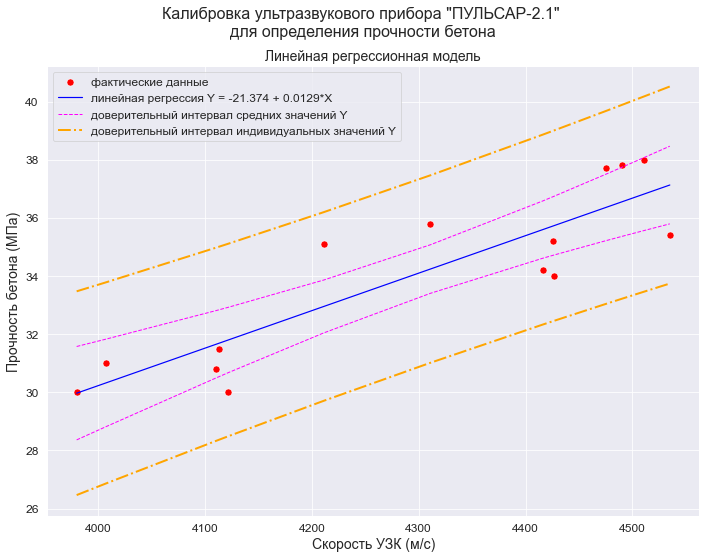

In [228]:
# создание рисунка (Figure) и области рисования (Axes)
fig, axes = plt.subplots(figsize=(297/INCH, 210/INCH))
# заголовок рисунка (Figure)
title_figure = Task_Project
fig.suptitle(title_figure, fontsize = 16)
# заголовок области рисования (Axes)
title_axes = 'Линейная регрессионная модель'
axes.set_title(title_axes, fontsize = 14)
# фактические данные
sns.scatterplot(
    x=st_df['X'], y=st_df['Dep Var Population'],
    label='фактические данные',
    s=50,
    color='red',
    ax=axes)
# график регрессионной модели
label_legend_regr_model=f'линейная регрессия Y = {b0:.3f} + {b1:.4f}*X'
sns.lineplot(
    x=st_df['X'], y=st_df['Predicted Value'],
    label=label_legend_regr_model,
    color='blue',
    ax=axes)
# доверительный интервал средних значений переменной Y
Mean_ci_low = st_df['Mean ci 95% low']
plt.plot(
    st_df['X'], Mean_ci_low,
    color='magenta', linestyle='--', linewidth=1,
    label='доверительный интервал средних значений Y')
Mean_ci_upp = st_df['Mean ci 95% upp']
plt.plot(
    st_df['X'], Mean_ci_upp,
    color='magenta', linestyle='--', linewidth=1)
# доверительный интервал индивидуальных значений переменной Y
Predict_ci_low = st_df['Predict ci 95% low']
plt.plot(
    st_df['X'], Predict_ci_low,
    color='orange', linestyle='-.', linewidth=2,
    label='доверительный интервал индивидуальных значений Y')
Predict_ci_upp = st_df['Predict ci 95% upp']
plt.plot(
    st_df['X'], Predict_ci_upp,
    color='orange', linestyle='-.', linewidth=2)

axes.set_xlabel(Variable_Name_X)
axes.set_ylabel(Variable_Name_Y)
axes.legend(prop={'size': 12})
plt.show()

Однако, мы получили данные о границах доверительных интервалов регрессионной модели только в пределах области фактических значений переменной **X**. Как быть, если мы хотим распространить прогноз за пределы этой области?

<font size="5"> <u>**Прогнозирование**</u>

Под прогнозированием мы в данном случае будем понимать определение значений переменной **Y** и доверительных интервалов для ее средних и индивидуальных значений при заданном **X**. По сути, нам предстоит построить аналог рассмотренной выше таблицы **summary_table**, только с другими значениями **X**, причем эти значения могут выходить за пределы тех значений, которые использовались нами для построения регрессии.

Методика расчета доверительных интервалов регрессионных моделей разобрана в статье **"Python, корреляция и регрессия: часть 4"** (https://habr.com/ru/post/558158/), всем рекомендую ознакомиться.

Найти прогнозные значения **Y** не представляет труда, так как ранее мы уже формализовали модель в виде лямбда-функции, а вот для построения доверительных интервалов придется выполнить расчеты по формулам. Для этого создадим пользовательскую функцию **regression_pair_predict**, которая в случае <u>парной регрессии (**pair regression**)</u> для заданного значения **X** возвращает:
* прогнозируемое по регрессионной модели значение **y_calc**
* доверительный интервал **[y_calc_mean_ci_low, y_calc_mean_ci_upp]** средних значений переменной **Y**
* доверительный интервал **[y_calc_predict_ci_low, y_calc_predict_ci_upp]** индивидуальных значений переменной **Y**
  
Алгоритм расчета доверительных интервалов для <u>множественной регрессии (**multiple regression**)</u> отличается и в данном обзоре не рассматривается (рассмотрим в дальнейшем).

Про прогнозирование с помощью регрессионных моделей - см.также:
* https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.predict.html?highlight=predict#statsmodels.regression.linear_model.RegressionResults.predict
* https://www.statology.org/statsmodels-predict/
* https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html

In [229]:
def regression_pair_predict(
    x_in,
    model_fit,
    regression_model,
    p_level: float=0.95):
    
    a_level = 1 - p_level
    
    X = pd.DataFrame(model_fit.model.exog)[1].values    # найти лучшее решение
    Y = model_fit.model.endog
    
    # вспомогательные величины
    n = int(result_linear_ols.nobs)
    SSE = model_fit.ssr    # SSE (Sum of Squared Error)
    dfE = n - p - 1
    MSE = SSE / dfE    # остаточная дисперсия
    
    Xmean = np.mean(X)
    SST_X = np.sum([(X[i] - Xmean)**2 for i in range(0, n)])
    
    t_table = sci.stats.t.ppf((1 + p_level)/2 , dfE)
    S2_y_calc_mean = MSE * (1/n + (x_in - Xmean)**2 / SST_X)
    S2_y_calc_predict = MSE * (1 + 1/n + (x_in - Xmean)**2 / SST_X)
        
    # прогнозируемое значение переменной Y
    y_calc=regression_model(x_in)
    # доверительный интервал средних значений переменной Y
    y_calc_mean_ci_low = y_calc - t_table*sqrt(S2_y_calc_mean)
    y_calc_mean_ci_upp = y_calc + t_table*sqrt(S2_y_calc_mean)
    # доверительный интервал индивидуальных значений переменной Y
    y_calc_predict_ci_low = y_calc - t_table*sqrt(S2_y_calc_predict)
    y_calc_predict_ci_upp = y_calc + t_table*sqrt(S2_y_calc_predict)
    
    result = y_calc, y_calc_mean_ci_low, y_calc_mean_ci_upp, y_calc_predict_ci_low, y_calc_predict_ci_upp
    
    return result

Сравним результаты расчета доверительных интервалов разными способами - с использованием функции **regression_pair_predict** и средствами **statsmodels**, для этого сформируем DaraFrame с новыми данными:

In [230]:
regression_pair_predict_df = pd.DataFrame(
    [regression_pair_predict(elem, result_linear_ols, regression_model=Y_calc) for elem in st_df['X'].values],
    columns=['y_calc', 'y_calc_mean_ci_low', 'y_calc_mean_ci_upp', 'y_calc_predict_ci_low', 'y_calc_predict_ci_upp'])
regression_pair_predict_df.insert(0, 'X', st_df['X'].values)
display(regression_pair_predict_df)

,X,y_calc,y_calc_mean_ci_low,y_calc_mean_ci_upp,y_calc_predict_ci_low,y_calc_predict_ci_upp
0,3980,29.9685,28.3622,31.5747,26.4647,33.4722
1,4007,30.3168,28.8099,31.8236,26.8575,33.7761
2,4110,31.6455,30.4860,32.8050,28.3227,34.9683
3,4113,31.6842,30.5338,32.8346,28.3646,35.0038
4,4122,31.8003,30.6766,32.9240,28.4898,35.1108
5,4211,32.9484,32.0388,33.8581,29.7044,36.1925
6,4311,34.2384,33.4034,35.0735,31.0145,37.4623
7,4416,35.5929,34.6084,36.5775,32.3271,38.8588
8,4426,35.7219,34.7135,36.7304,32.4488,38.9951
9,4427,35.7348,34.7239,36.7458,32.4610,39.0087


Видим, что результаты расчетов идентичны, следовательно мы можем использовать функцию **regression_pair_predict** для прогнозирования. 

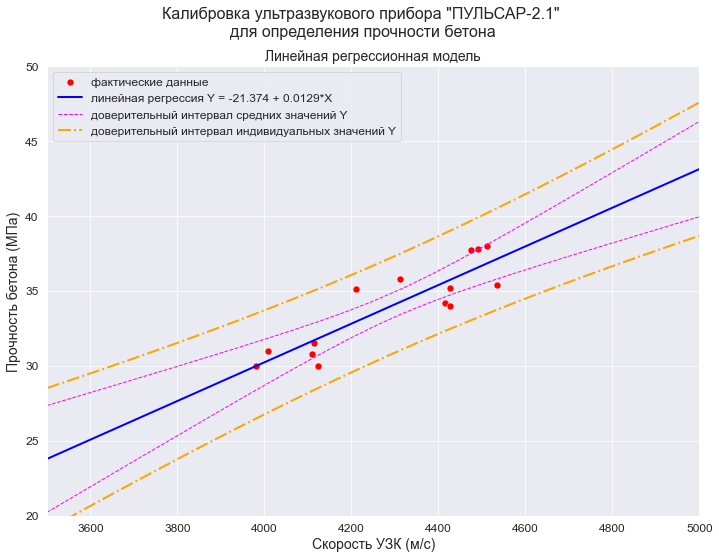

,x_calc,y_calc,y_calc_mean_ci_low,y_calc_mean_ci_upp,y_calc_predict_ci_low,y_calc_predict_ci_upp
0,3500.0000,23.7764,20.2124,27.3404,19.0437,28.5091
1,3562.5000,24.5827,21.2829,27.8824,20.0456,29.1197
2,3625.0000,25.3889,22.3519,28.4259,21.0392,29.7386
3,3687.5000,26.1952,23.4191,28.9713,22.0235,30.3669
4,3750.0000,27.0014,24.4838,29.5190,22.9971,31.0058
5,3812.5000,27.8077,25.5453,30.0701,23.9587,31.6567
6,3875.0000,28.6140,26.6024,30.6256,24.9068,32.3211
7,3937.5000,29.4202,27.6530,31.1875,25.8398,33.0007
8,4000.0000,30.2265,28.6941,31.7589,26.7560,33.6970
9,4062.5000,31.0327,29.7207,32.3448,27.6537,34.4118


In [233]:
def graph_regression_pair_predict_plot_sns(
    model_fit,
    regression_model_in,
    Xmin=None, Xmax=None, Nx=10,
    Ymin_graph=None, Ymax_graph=None,
    title_figure=None, title_figure_fontsize=18,
    title_axes=None, title_axes_fontsize=16,
    x_label=None,
    y_label=None,
    label_fontsize=14, tick_fontsize=12, 
    label_legend_regr_model='', label_legend_fontsize=12,
    s=50, linewidth_regr_model=2,
    graph_size=(297/INCH, 210/INCH),
    result_output=True,
    file_name=None):
    
    # фактические данные
    X = pd.DataFrame(model_fit.model.exog)[1].values    # найти лучшее решение
    Y = model_fit.model.endog
    X = np.array(X)
    Y = np.array(Y)
    
    # границы
    if not(Xmin) and not(Xmax):
        Xmin=min(X)
        Xmax=max(X)
        Xmin_graph=min(X)*0.99
        Xmax_graph=max(X)*1.01
    else:
        Xmin_graph=Xmin
        Xmax_graph=Xmax
    
    if not(Ymin_graph) and not(Ymax_graph):
        Ymin_graph=min(Y)*0.99
        Ymax_graph=max(Y)*1.01       
    
    # формируем DataFrame данных
    Xcalc = np.linspace(Xmin, Xmax, num=Nx)
    Ycalc = regression_model_in(Xcalc)
    
    result_df = pd.DataFrame(
        [regression_pair_predict(elem, model_fit, regression_model=regression_model_in) for elem in Xcalc],
        columns=['y_calc', 'y_calc_mean_ci_low', 'y_calc_mean_ci_upp', 'y_calc_predict_ci_low', 'y_calc_predict_ci_upp'])
    result_df.insert(0, 'x_calc', Xcalc)
            
    # заголовки графика
    fig, axes = plt.subplots(figsize=graph_size)
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    axes.set_title(title_axes, fontsize = title_axes_fontsize)
    
    # фактические данные
    sns.scatterplot(
        x=X, y=Y,
        label='фактические данные',
        s=s,
        color='red',
        ax=axes)
    
    # график регрессионной модели
    sns.lineplot(
        x=Xcalc, y=Ycalc,
        color='blue',
        linewidth=linewidth_regr_model,
        legend=True,
        label=label_legend_regr_model,
        ax=axes)
    
    # доверительный интервал средних значений переменной Y
    Mean_ci_low = result_df['y_calc_mean_ci_low']
    plt.plot(
        result_df['x_calc'], Mean_ci_low,
        color='magenta', linestyle='--', linewidth=1,
        label='доверительный интервал средних значений Y')
    
    Mean_ci_upp = result_df['y_calc_mean_ci_upp']
    plt.plot(
        result_df['x_calc'], Mean_ci_upp,
        color='magenta', linestyle='--', linewidth=1)
    
    # доверительный интервал индивидуальных значений переменной Y
    Predict_ci_low = result_df['y_calc_predict_ci_low']
    plt.plot(
        result_df['x_calc'], Predict_ci_low,
        color='orange', linestyle='-.', linewidth=2,
        label='доверительный интервал индивидуальных значений Y')
    
    Predict_ci_upp = result_df['y_calc_predict_ci_upp']
    plt.plot(
        result_df['x_calc'], Predict_ci_upp,
        color='orange', linestyle='-.', linewidth=2)
    
        
    axes.set_xlim(Xmin_graph, Xmax_graph)
    axes.set_ylim(Ymin_graph, Ymax_graph)        
    axes.set_xlabel(x_label, fontsize = label_fontsize)
    axes.set_ylabel(y_label, fontsize = label_fontsize)
    axes.tick_params(labelsize = tick_fontsize)
    #axes.tick_params(labelsize = tick_fontsize)
    axes.legend(prop={'size': label_legend_fontsize})
        
    plt.show()
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
        
    if result_output:
        return result_df
    else:
        return

graph_regression_pair_predict_plot_sns(
    model_fit=result_linear_ols,
    regression_model_in=Y_calc,
    Xmin=Xmin_graph-300, Xmax=Xmax_graph+200, Nx=25,
    Ymin_graph=Ymin_graph-5, Ymax_graph=Ymax_graph+5,
    title_figure=Task_Project, title_figure_fontsize=16,
    title_axes='Линейная регрессионная модель', title_axes_fontsize=14,
    x_label=Variable_Name_X,
    y_label=Variable_Name_Y,
    label_legend_regr_model=f'линейная регрессия Y = {b0:.3f} + {b1:.4f}*X',
    s=50,
    result_output=True,
    file_name='graph/regression_plot_lin.png')

<font size="5"> <u>**Выводы и рекомендации**</u>

Исследована зависимость показаний ультразвукового прибора "ПУЛЬСАР-2.1" (**X**) и результатов замера прочности бетона (методом отрыва со скалыванием) склерометром ИПС-МГ4.03 (**Y**).

Между переменными имеется весьма сильная линейная корреляционная связь. Получена регрессионная модель:

**Y = b0 + b1∙X = -21.3741 + 0.0129∙X**<br>

Модель хорошо аппроксимирует фактические данные, является адекватной, значимой и может использоваться для предсказания прочности бетона.

Также построен график прогноза с доверительными интервалами.


### <center> <u> <font size="5"> ***ИТОГИ***

Итак, мы рассмотрели все этапы регрессионного анализа в случае **простой линейной регрессии (simple linear regression)** с использованием библиотеки **statsmodels** на конкретном практическом примере; подробно остановились на статистическом анализа модели с проверкой гипотез; также предложен ряд пользовательских функций, облегчающих работу исследователя и уменьшающих размер программного кода.

Конечно, мы разобрали далеко не все вопросы анализа регрессионных моделей и возможности библиотеки **statsmodels** применительно к **simple linear regression**, в частности статистики влияния (**Influence Statistics**), инструмент **Leverage**, анализ стьюдентизированных остатков и пр. - это темы для отдельных обзоров.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods).

Надеюсь, данный обзор поможет специалистам **DataScience** в работе.


In [232]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time, 3)} c")

Общее время выполнения расчетов: 7913.807 c
